<a href="https://colab.research.google.com/github/AlecSofiste/Analise_diversidade/blob/main/Analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importa√ß√µes

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

#Uso da biblioteca Pandas

In [ ]:
#Montado drive para importar conte√∫do
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Atribuindo a planilha_modulo3 √† vari√°vel dados
dados = pd.read_excel('/content/drive/MyDrive/Curso Programaria/planilha_modulo3.xlsx')

In [ ]:
#mostrando o conte√∫do da vari√°vel dados
dados

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
0              0  zzqzz3l9ily8nuo2m7wyzzqzz3w48o96   39.0       35-39   
1              1  zzls2oftfn9law393oezzls2ofhvfpzd   32.0       30-34   
2              2  zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi   53.0       50-54   
3              3  zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl   27.0       25-29   
4              4  zzaf1m95yan929rb94wzzaf1mekhvhpg   46.0       45-49   
...          ...                               ...    ...         ...   
4266        4266  01jnrn9f6va0menfhk2ztm01jnrn96bp   26.0       25-29   
4267        4267  01dyfxam4u4bi29fem01dyfxaq9akvqp   30.0       30-34   
4268        4268  00zw9ks9d40z4u00zz3d20iix65qpli3   29.0       25-29   
4269        4269  00xu7yujd7s57emj00xu7y0c3njix3de    NaN       17-21   
4270        4270  00lb35llmdsidpa00lb35qcdysnzvhv7   24.0       22-24   

         GENERO COR/RACA/ETNIA  PCD  \
0     Masculino          Parda  N√£o   
1     Masculino          Parda  N√£o   
2     Masculino         Branca  N√£o   
3     Masculino         Branca  N√£o   
4      Feminino         Branca  N√£o   
...         ...            ...  ...   
4266  Masculino         Branca  N√£o   
4267   Feminino         Branca  N√£o   
4268  Masculino         Branca  N√£o   
4269  Masculino         Branca  N√£o   
4270  Masculino         Branca  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
0     N√£o acredito que minha experi√™ncia profissiona...   
1     Sim, acredito que a minha a experi√™ncia profis...   
2                                                   NaN   
3                                                   NaN   
4     N√£o acredito que minha experi√™ncia profissiona...   
...                                                 ...   
4266                                                NaN   
4267  N√£o acredito que minha experi√™ncia profissiona...   
4268                                                NaN   
4269                                                NaN   
4270                                                NaN   

                             ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
0                                              NaN            True  ...   
1     Aprova√ß√£o em processos seletivos/entrevistas            True  ...   
2                                              NaN            True  ...   
3                                              NaN            True  ...   
4                                              NaN            True  ...   
...                                            ...             ...  ...   
4266                                           NaN            True  ...   
4267                                           NaN            True  ...   
4268                                           NaN            True  ...   
4269                                           NaN            True  ...   
4270                                           NaN            True  ...   

                                    SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
0                           Setor P√∫blico         Acima de 3.000     0.0   
1                             Outra Op√ß√£o         Acima de 3.000     1.0   
2                      Finan√ßas ou Bancos         Acima de 3.000     0.0   
3                        Setor Automotivo         Acima de 3.000     0.0   
4                           Setor P√∫blico           de 101 a 500     0.0   
...                                   ...                    ...     ...   
4266       Tecnologia/F√°brica de Software         Acima de 3.000     0.0   
4267                  √Årea de Consultoria            de 51 a 100     0.0   
4268  Setor Imobili√°rio/ Constru√ß√£o Civil           de 101 a 500     1.0   
4269                            Ind√∫stria       de 1.001 a 3.000     0.0   
4270                         Agroneg√≥cios         de 501 a 1.000     0.0   

           CARGO COMO GESTOR  \
0                        NaN   
1     Supervisor/Coordenador   
2         

In [ ]:
#mostrando as primeiras linhas da tabela dados
dados.head()

Unnamed: 0                                ID  IDADE FAIXA IDADE     GENERO  \
0           0  zzqzz3l9ily8nuo2m7wyzzqzz3w48o96   39.0       35-39  Masculino   
1           1  zzls2oftfn9law393oezzls2ofhvfpzd   32.0       30-34  Masculino   
2           2  zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi   53.0       50-54  Masculino   
3           3  zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl   27.0       25-29  Masculino   
4           4  zzaf1m95yan929rb94wzzaf1mekhvhpg   46.0       45-49   Feminino   

  COR/RACA/ETNIA  PCD               EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
0          Parda  N√£o  N√£o acredito que minha experi√™ncia profissiona...   
1          Parda  N√£o  Sim, acredito que a minha a experi√™ncia profis...   
2         Branca  N√£o                                                NaN   
3         Branca  N√£o                                                NaN   
4         Branca  N√£o  N√£o acredito que minha experi√™ncia profissiona...   

                          ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
0                                           NaN            True  ...   
1  Aprova√ß√£o em processos seletivos/entrevistas            True  ...   
2                                           NaN            True  ...   
3                                           NaN            True  ...   
4                                           NaN            True  ...   

                SETOR NUMERO DE FUNCIONARIOS GESTOR?       CARGO COMO GESTOR  \
0       Setor P√∫blico         Acima de 3.000     0.0                     NaN   
1         Outra Op√ß√£o         Acima de 3.000     1.0  Supervisor/Coordenador   
2  Finan√ßas ou Bancos         Acima de 3.000     0.0                     NaN   
3    Setor Automotivo         Acima de 3.000     0.0                     NaN   
4       Setor P√∫blico           de 101 a 500     0.0                     NaN   

                                         CARGO ATUAL   NIVEL  \
0                DBA/Administrador de Banco de Dados  J√∫nior   
1                                                NaN     NaN   
2  Desenvolvedor/ Engenheiro de Software/ Analist...   Pleno   
3                  Cientista de Dados/Data Scientist  S√™nior   
4  Desenvolvedor/ Engenheiro de Software/ Analist...   Pleno   

                     FAIXA SALARIAL  \
0   de R$ 8.001/m√™s a R$ 12.000/m√™s   
1    de R$ 4.001/m√™s a R$ 6.000/m√™s   
2  de R$ 12.001/m√™s a R$ 16.000/m√™s   
3  de R$ 12.001/m√™s a R$ 16.000/m√™s   
4    de R$ 6.001/m√™s a R$ 8.000/m√™s   

  QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?  \
0                                      de 1 a 2 anos       
1                                      de 3 a 4 anos       
2                                      de 3 a 4 anos       
3                                      de 4 a 6 anos       
4             N√£o tenho experi√™ncia na √°rea de dados       

  QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?  \
0                                     de 7 a 10 anos                                                                          
1                                     Menos de 1 ano                                                                          
2                                    Mais de 10 anos                                                                          
3  N√£o tive experi√™ncia na √°rea de TI/Engenharia ...                                                                          
4                                    Mais de 10 anos                                                                          

   SALARIO  
0  11194.0  
1   4695.0  
2  14202.0  
3  15463.0  
4   7733.0  

[5 rows x 28 columns]

In [ ]:
#mostrando as ultimas linhas da tabela dados
dados.tail()

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
4266        4266  01jnrn9f6va0menfhk2ztm01jnrn96bp   26.0       25-29   
4267        4267  01dyfxam4u4bi29fem01dyfxaq9akvqp   30.0       30-34   
4268        4268  00zw9ks9d40z4u00zz3d20iix65qpli3   29.0       25-29   
4269        4269  00xu7yujd7s57emj00xu7y0c3njix3de    NaN       17-21   
4270        4270  00lb35llmdsidpa00lb35qcdysnzvhv7   24.0       22-24   

         GENERO COR/RACA/ETNIA  PCD  \
4266  Masculino         Branca  N√£o   
4267   Feminino         Branca  N√£o   
4268  Masculino         Branca  N√£o   
4269  Masculino         Branca  N√£o   
4270  Masculino         Branca  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA ASPECTOS_PREJUDICADOS  \
4266                                                NaN                   NaN   
4267  N√£o acredito que minha experi√™ncia profissiona...                   NaN   
4268                                                NaN                   NaN   
4269                                                NaN                   NaN   
4270                                                NaN                   NaN   

      VIVE_NO_BRASIL  ...                                SETOR  \
4266            True  ...       Tecnologia/F√°brica de Software   
4267            True  ...                  √Årea de Consultoria   
4268            True  ...  Setor Imobili√°rio/ Constru√ß√£o Civil   
4269            True  ...                            Ind√∫stria   
4270            True  ...                         Agroneg√≥cios   

     NUMERO DE FUNCIONARIOS GESTOR?  CARGO COMO GESTOR  \
4266         Acima de 3.000     0.0                NaN   
4267            de 51 a 100     0.0                NaN   
4268           de 101 a 500     1.0       Gerente/Head   
4269       de 1.001 a 3.000     0.0                NaN   
4270         de 501 a 1.000     0.0                NaN   

                                            CARGO ATUAL   NIVEL  \
4266                     Analista de Dados/Data Analyst   Pleno   
4267  Engenheiro de Dados/Arquiteto de Dados/Data En...   Pleno   
4268                                                NaN     NaN   
4269                                        Outra Op√ß√£o  J√∫nior   
4270                     Analista de Dados/Data Analyst  J√∫nior   

                        FAIXA SALARIAL  \
4266    de R$ 4.001/m√™s a R$ 6.000/m√™s   
4267    de R$ 3.001/m√™s a R$ 4.000/m√™s   
4268  de R$ 16.001/m√™s a R$ 20.000/m√™s   
4269             Menos de R$ 1.000/m√™s   
4270    de R$ 3.001/m√™s a R$ 4.000/m√™s   

     QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?  \
4266                                      de 3 a 4 anos       
4267                                      de 1 a 2 anos       
4268                                      de 4 a 6 anos       
4269                                     Menos de 1 ano       
4270                                      de 1 a 2 anos       

     QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?  \
4266                                     de 7 a 10 anos                                                                          
4267  N√£o tive experi√™ncia na √°rea de TI/Engenharia ...                                                                          
4268  N√£o tive experi√™ncia na √°rea de TI/Engenharia ...                                                                          
4269  N√£o tive experi√™ncia na √°rea de TI/Engenharia ...                                                                          
4270  N√£o tive experi√™ncia na √°rea de TI/Engenharia ...                                                                          

      SALARIO  
4266   4329.0  
4267   3758.0  
4268  19607.0  
4269    989.0  
4270   3079.0  

[5 rows x 28 columns]

In [ ]:
#mostrando numero de linhas e colunas da tabela dados
dados.shape

(4271, 28)

In [ ]:
#mostrando o numero de itens na tabela
len(dados)

4271

In [ ]:
#mostrando quais s√£o as colunas da tabela dados
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', '√ÅREA DE FORMA√á√ÉO',
       'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
#fun√ß√£o info mostra √≠ndices, colunas, total de dados, quantidade de cada tipo de dado(dtypes),valores n√£o nulos e mem√≥ria ocupada.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
#fun√ß√£o describe d√° informa√ß√µes sobre as vari√°veis num√©ricas, valores m√°ximos e m√≠nimos, m√©dia, desvio e mediana
dados.describe()

Unnamed: 0        IDADE  MUDOU DE ESTADO?      GESTOR?        SALARIO
count  4271.000000  4197.000000       4171.000000  3694.000000    3694.000000
mean   2135.000000    31.169168          0.806281     0.193016   10969.266919
std    1233.075829     6.902803          0.395258     0.394719   19419.753189
min       0.000000    18.000000          0.000000     0.000000      35.000000
25%    1067.500000    26.000000          1.000000     0.000000    4269.500000
50%    2135.000000    30.000000          1.000000     0.000000    7625.500000
75%    3202.500000    35.000000          1.000000     0.000000   12778.500000
max    4270.000000    54.000000          1.000000     1.000000  485191.000000

# Repetindo an√°lise do excel

###Dicas de fun√ß√µes
Reiniciar o √≠ndice ao filtrar dados (reset_index)

Remover ou renomear colunas (.drop(columns=[]) e .rename(columns={}))

Remover valores duplicados e/ou ausentes (.drop_duplicates() e .dropna())

Tratar valores ausentes, substituindo nulos por zero, por exemplo (.fillna(0))

Converter tipos de dados (.astype())

Criar, dividir ou reordenar colunas (para dividir: .split())

Remover espa√ßos em branco (.strip())

Classificar os dados (.sort_values(by='coluna', ascending=False))



In [ ]:
#Mostrando novamente as colunas da tabela
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', '√ÅREA DE FORMA√á√ÉO',
       'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
#mostrando coluna especifica da tabela
dados['GENERO']

0       Masculino
1       Masculino
2       Masculino
3       Masculino
4        Feminino
          ...    
4266    Masculino
4267     Feminino
4268    Masculino
4269    Masculino
4270    Masculino
Name: GENERO, Length: 4271, dtype: object

In [ ]:
#filtrando dados por coluna, buscando valor especificado
dados[dados['GENERO']=='Feminino']

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
4              4  zzaf1m95yan929rb94wzzaf1mekhvhpg   46.0       45-49   
5              5  zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v   32.0       30-34   
7              7  zyc0twzno2sm5or5ovoxzyc0twz0300d   31.0       30-34   
9              9  zxc3d314cn1c2ovmzxc34ha7nkw1na3j    NaN         55+   
10            10  zwy34gktg0tfjq2ttjvazwy34gg3g49i   25.0       25-29   
...          ...                               ...    ...         ...   
4248        4248  070o4zayoboztox764qu070o4zafbqrd   27.0       25-29   
4251        4251  068hhicrqggu068huq0l2ab3g7liagy8   34.0       30-34   
4258        4258  03zjgijmnwv9qrlzbr03zjgij1eae1hw   25.0       25-29   
4259        4259  03n2lq8st9zobnowu3w03n2lqi0flz2w   28.0       25-29   
4267        4267  01dyfxam4u4bi29fem01dyfxaq9akvqp   30.0       30-34   

        GENERO COR/RACA/ETNIA  PCD  \
4     Feminino         Branca  N√£o   
5     Feminino          Parda  N√£o   
7     Feminino         Branca  N√£o   
9     Feminino          Parda  N√£o   
10    Feminino          Parda  N√£o   
...        ...            ...  ...   
4248  Feminino         Branca  N√£o   
4251  Feminino          Preta  N√£o   
4258  Feminino         Branca  N√£o   
4259  Feminino         Branca  N√£o   
4267  Feminino         Branca  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
4     N√£o acredito que minha experi√™ncia profissiona...   
5     N√£o acredito que minha experi√™ncia profissiona...   
7     N√£o acredito que minha experi√™ncia profissiona...   
9     N√£o acredito que minha experi√™ncia profissiona...   
10    N√£o acredito que minha experi√™ncia profissiona...   
...                                                 ...   
4248  N√£o acredito que minha experi√™ncia profissiona...   
4251  N√£o acredito que minha experi√™ncia profissiona...   
4258  Sim, acredito que a minha a experi√™ncia profis...   
4259  Sim, acredito que a minha a experi√™ncia profis...   
4267  N√£o acredito que minha experi√™ncia profissiona...   

                                  ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
4                                                   NaN            True  ...   
5                                                   NaN            True  ...   
7                                                   NaN            True  ...   
9                                                   NaN            True  ...   
10                                                  NaN            True  ...   
...                                                 ...             ...  ...   
4248                                                NaN            True  ...   
4251                                                NaN            True  ...   
4258  Senioridade das vagas recebidas em rela√ß√£o √† s...            True  ...   
4259  Rela√ß√£o com outros membros da empresa, em mome...            True  ...   
4267                                                NaN            True  ...   

                               SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
4                      Setor P√∫blico           de 101 a 500     0.0   
5                           Educa√ß√£o         Acima de 3.000     0.0   
7     Tecnologia/F√°brica de Software              de 6 a 10     0.0   
9                           Educa√ß√£o         Acima de 3.000     0.0   
10                            Varejo           de 101 a 500     0.0   
...                              ...                    ...     ...   
4248              Finan√ßas ou Bancos           de 101 a 500     0.0   
4251              Finan√ßas ou Bancos       de 1.001 a 3.000     0.0   
4258                             NaN                    NaN     NaN   
4259              Finan√ßas ou Bancos         Acima de 3.000     1.0   
4267             √Årea de Consultoria            de 51 a 100     0.0   

           CARGO COMO GESTOR  \
4                        NaN   
5                        NaN   
7         

In [ ]:
#filtrando dados por coluna, buscando valor especificado
dados[dados['GENERO']!='Masculino']

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
4              4  zzaf1m95yan929rb94wzzaf1mekhvhpg   46.0       45-49   
5              5  zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v   32.0       30-34   
7              7  zyc0twzno2sm5or5ovoxzyc0twz0300d   31.0       30-34   
9              9  zxc3d314cn1c2ovmzxc34ha7nkw1na3j    NaN         55+   
10            10  zwy34gktg0tfjq2ttjvazwy34gg3g49i   25.0       25-29   
...          ...                               ...    ...         ...   
4248        4248  070o4zayoboztox764qu070o4zafbqrd   27.0       25-29   
4251        4251  068hhicrqggu068huq0l2ab3g7liagy8   34.0       30-34   
4258        4258  03zjgijmnwv9qrlzbr03zjgij1eae1hw   25.0       25-29   
4259        4259  03n2lq8st9zobnowu3w03n2lqi0flz2w   28.0       25-29   
4267        4267  01dyfxam4u4bi29fem01dyfxaq9akvqp   30.0       30-34   

        GENERO COR/RACA/ETNIA  PCD  \
4     Feminino         Branca  N√£o   
5     Feminino          Parda  N√£o   
7     Feminino         Branca  N√£o   
9     Feminino          Parda  N√£o   
10    Feminino          Parda  N√£o   
...        ...            ...  ...   
4248  Feminino         Branca  N√£o   
4251  Feminino          Preta  N√£o   
4258  Feminino         Branca  N√£o   
4259  Feminino         Branca  N√£o   
4267  Feminino         Branca  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
4     N√£o acredito que minha experi√™ncia profissiona...   
5     N√£o acredito que minha experi√™ncia profissiona...   
7     N√£o acredito que minha experi√™ncia profissiona...   
9     N√£o acredito que minha experi√™ncia profissiona...   
10    N√£o acredito que minha experi√™ncia profissiona...   
...                                                 ...   
4248  N√£o acredito que minha experi√™ncia profissiona...   
4251  N√£o acredito que minha experi√™ncia profissiona...   
4258  Sim, acredito que a minha a experi√™ncia profis...   
4259  Sim, acredito que a minha a experi√™ncia profis...   
4267  N√£o acredito que minha experi√™ncia profissiona...   

                                  ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
4                                                   NaN            True  ...   
5                                                   NaN            True  ...   
7                                                   NaN            True  ...   
9                                                   NaN            True  ...   
10                                                  NaN            True  ...   
...                                                 ...             ...  ...   
4248                                                NaN            True  ...   
4251                                                NaN            True  ...   
4258  Senioridade das vagas recebidas em rela√ß√£o √† s...            True  ...   
4259  Rela√ß√£o com outros membros da empresa, em mome...            True  ...   
4267                                                NaN            True  ...   

                               SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
4                      Setor P√∫blico           de 101 a 500     0.0   
5                           Educa√ß√£o         Acima de 3.000     0.0   
7     Tecnologia/F√°brica de Software              de 6 a 10     0.0   
9                           Educa√ß√£o         Acima de 3.000     0.0   
10                            Varejo           de 101 a 500     0.0   
...                              ...                    ...     ...   
4248              Finan√ßas ou Bancos           de 101 a 500     0.0   
4251              Finan√ßas ou Bancos       de 1.001 a 3.000     0.0   
4258                             NaN                    NaN     NaN   
4259              Finan√ßas ou Bancos         Acima de 3.000     1.0   
4267             √Årea de Consultoria            de 51 a 100     0.0   

           CARGO COMO GESTOR  \
4                        NaN   
5                        NaN   
7         

In [ ]:
#filtrando da coluna genero, os dados que contenham a string 'n√£o' para localizar  as ID que preferiram n√£o informar genero
dados[dados['GENERO'].str.contains('n√£o', na=False)]

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
562          562  vhuw8xnpbmj6oh20xovhuwcbdl4a12ni   29.0       25-29   
1528        1528  n2ktdn33istvlu1ha4v3kn2ktdn1rsp1    NaN         55+   
1913        1913  k3as6jdh3w4jf4ztsw4kpkk3as6jdy19   30.0       30-34   
1925        1925  jzppdwep2kpisqjjzppdh304v83cj7eu    NaN       17-21   
2554        2554  f5l206z0hr9uh3nz2iiff5l206c0g10o   20.0       17-21   
3090        3090  a6ugmsw7s8hu5aa6uglio5apj74fam9o   26.0       25-29   
3357        3357  7q0icczxn0l3a894cbx7q0icczjyud0n   29.0       25-29   
3493        3493  6m8haop6lxnaizpwij6m8haopiax98jg   25.0       25-29   
3610        3610  5mloglozmr0r715mntaxbt6xy8b5olmb   30.0       30-34   
4171        4171  0rksyxnqhn13nwytwi6y0rkssx6jmodf   26.0       25-29   
4200        4200  0liu228yff8fnm3zeuahsx0liu228y07   28.0       25-29   
4227        4227  0eqzo5w2l5wizswvwywt8h0eqzo5yucv   28.0       25-29   

                    GENERO        COR/RACA/ETNIA                   PCD  \
562   Prefiro n√£o informar                 Parda                   N√£o   
1528  Prefiro n√£o informar              Ind√≠gena  Prefiro n√£o informar   
1913  Prefiro n√£o informar  Prefiro n√£o informar                   N√£o   
1925  Prefiro n√£o informar  Prefiro n√£o informar  Prefiro n√£o informar   
2554  Prefiro n√£o informar  Prefiro n√£o informar                   N√£o   
3090  Prefiro n√£o informar                 Parda                   N√£o   
3357  Prefiro n√£o informar                 Preta                   N√£o   
3493  Prefiro n√£o informar                Branca                   N√£o   
3610  Prefiro n√£o informar                Branca                   N√£o   
4171  Prefiro n√£o informar                Branca                   N√£o   
4200  Prefiro n√£o informar                 Outra                   N√£o   
4227  Prefiro n√£o informar                 Preta                   N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
562   Sim, acredito que a minha a experi√™ncia profis...   
1528  N√£o acredito que minha experi√™ncia profissiona...   
1913  N√£o acredito que minha experi√™ncia profissiona...   
1925  Sim, acredito que minha experi√™ncia profission...   
2554  N√£o acredito que minha experi√™ncia profissiona...   
3090  N√£o acredito que minha experi√™ncia profissiona...   
3357  N√£o acredito que minha experi√™ncia profissiona...   
3493  Sim, acredito que a minha a experi√™ncia profis...   
3610  Sim, acredito que a minha a experi√™ncia profis...   
4171  N√£o acredito que minha experi√™ncia profissiona...   
4200  N√£o acredito que minha experi√™ncia profissiona...   
4227  Sim, acredito que a minha a experi√™ncia profis...   

                                  ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
562   Aten√ß√£o dada pelas pessoas diante das minhas o...            True  ...   
1528                                                NaN            True  ...   
1913                                                NaN            True  ...   
1925  Quantidade de oportunidades de emprego/vagas r...           False  ...   
2554                                                NaN            True  ...   
3090                                                NaN            True  ...   
3357                                                NaN            True  ...   
3493  Quantidade de oportunidades de emprego/vagas r...            True  ...   
3610               Velocidade de progress√£o de carreira            True  ...   
4171                                                NaN            True  ...   
4200                                                NaN            True  ...   
4227  Aten√ß√£o dada pelas pessoas diante das minhas o...            True  ...   

                                    SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
562                                   NaN                    NaN     NaN   
1528                        Setor P√∫blico            de 51 a 100     0.0   
191

In [ ]:
#filtrando da coluna idade, aqueles que s√£o maiores de 30 anos
dados[dados['IDADE']>30]

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
0              0  zzqzz3l9ily8nuo2m7wyzzqzz3w48o96   39.0       35-39   
1              1  zzls2oftfn9law393oezzls2ofhvfpzd   32.0       30-34   
2              2  zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi   53.0       50-54   
4              4  zzaf1m95yan929rb94wzzaf1mekhvhpg   46.0       45-49   
5              5  zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v   32.0       30-34   
...          ...                               ...    ...         ...   
4257        4257  043snvbsxn3fuyfe043j5comuyu8g6ba   46.0       45-49   
4260        4260  03atvow8404tatt2iixjds03atvownkz   36.0       35-39   
4261        4261  02xomoejng6c9152kde02xomww412qpg   33.0       30-34   
4262        4262  02vlm03c29g3fcys8tj06102vlm0983h   31.0       30-34   
4264        4264  028mfisr3mqazkn5n6swe028mt55nqzq   37.0       35-39   

         GENERO COR/RACA/ETNIA  PCD  \
0     Masculino          Parda  N√£o   
1     Masculino          Parda  N√£o   
2     Masculino         Branca  N√£o   
4      Feminino         Branca  N√£o   
5      Feminino          Parda  N√£o   
...         ...            ...  ...   
4257  Masculino        Amarela  N√£o   
4260  Masculino          Parda  N√£o   
4261  Masculino         Branca  N√£o   
4262  Masculino        Amarela  N√£o   
4264  Masculino         Branca  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
0     N√£o acredito que minha experi√™ncia profissiona...   
1     Sim, acredito que a minha a experi√™ncia profis...   
2                                                   NaN   
4     N√£o acredito que minha experi√™ncia profissiona...   
5     N√£o acredito que minha experi√™ncia profissiona...   
...                                                 ...   
4257  N√£o acredito que minha experi√™ncia profissiona...   
4260  N√£o acredito que minha experi√™ncia profissiona...   
4261                                                NaN   
4262  N√£o acredito que minha experi√™ncia profissiona...   
4264                                                NaN   

                             ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
0                                              NaN            True  ...   
1     Aprova√ß√£o em processos seletivos/entrevistas            True  ...   
2                                              NaN            True  ...   
4                                              NaN            True  ...   
5                                              NaN            True  ...   
...                                            ...             ...  ...   
4257                                           NaN            True  ...   
4260                                           NaN            True  ...   
4261                                           NaN            True  ...   
4262                                           NaN            True  ...   
4264                                           NaN            True  ...   

                               SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
0                      Setor P√∫blico         Acima de 3.000     0.0   
1                        Outra Op√ß√£o         Acima de 3.000     1.0   
2                 Finan√ßas ou Bancos         Acima de 3.000     0.0   
4                      Setor P√∫blico           de 101 a 500     0.0   
5                           Educa√ß√£o         Acima de 3.000     0.0   
...                              ...                    ...     ...   
4257              Finan√ßas ou Bancos         Acima de 3.000     1.0   
4260                             NaN                    NaN     NaN   
4261                             NaN                    NaN     NaN   
4262  Tecnologia/F√°brica de Software         de 501 a 1.000     1.0   
4264  Tecnologia/F√°brica de Software            de 51 a 100     1.0   

            CARGO COMO GESTOR  \
0                         NaN   
1      Supervisor/Coordenador   
2                         NaN   
4                         NaN 

In [ ]:
#filtrando da coluna idade e da coluna genero, as mulheres maiores de 30 anos
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
4              4  zzaf1m95yan929rb94wzzaf1mekhvhpg   46.0       45-49   
5              5  zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v   32.0       30-34   
7              7  zyc0twzno2sm5or5ovoxzyc0twz0300d   31.0       30-34   
14            14  zwez49k0jhdvfkfst4zwef137uuf4ivy   35.0       35-39   
23            23  zuqfcwtl9unfc5ezuqfcwm8coytsp5ap   46.0       45-49   
...          ...                               ...    ...         ...   
4214        4214  0gprow0ownrbfneftxf0gprow4kyrqdy   41.0       40-44   
4221        4221  0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d   34.0       30-34   
4240        4240  0a5xgxb1ljmuqn0un8a10a5xg4eufs2l   37.0       35-39   
4247        4247  07qzabp4ujpe4oz81udmb07qzabp4h0t   34.0       30-34   
4251        4251  068hhicrqggu068huq0l2ab3g7liagy8   34.0       30-34   

        GENERO COR/RACA/ETNIA                   PCD  \
4     Feminino         Branca                   N√£o   
5     Feminino          Parda                   N√£o   
7     Feminino         Branca                   N√£o   
14    Feminino          Parda                   N√£o   
23    Feminino         Branca                   N√£o   
...        ...            ...                   ...   
4214  Feminino         Branca  Prefiro n√£o informar   
4221  Feminino          Outra                   N√£o   
4240  Feminino         Branca                   N√£o   
4247  Feminino         Branca                   N√£o   
4251  Feminino          Preta                   N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
4     N√£o acredito que minha experi√™ncia profissiona...   
5     N√£o acredito que minha experi√™ncia profissiona...   
7     N√£o acredito que minha experi√™ncia profissiona...   
14    Sim, acredito que a minha a experi√™ncia profis...   
23    N√£o acredito que minha experi√™ncia profissiona...   
...                                                 ...   
4214  Sim, acredito que a minha a experi√™ncia profis...   
4221  N√£o acredito que minha experi√™ncia profissiona...   
4240  Sim, acredito que a minha a experi√™ncia profis...   
4247  N√£o acredito que minha experi√™ncia profissiona...   
4251  N√£o acredito que minha experi√™ncia profissiona...   

                                  ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
4                                                   NaN            True  ...   
5                                                   NaN            True  ...   
7                                                   NaN            True  ...   
14    Aten√ß√£o dada pelas pessoas diante das minhas o...            True  ...   
23                                                  NaN            True  ...   
...                                                 ...             ...  ...   
4214  Oportunidades de progress√£o de carreira, Veloc...            True  ...   
4221                                                NaN            True  ...   
4240  Quantidade de oportunidades de emprego/vagas r...            True  ...   
4247                                                NaN            True  ...   
4251                                                NaN            True  ...   

                               SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
4                      Setor P√∫blico           de 101 a 500     0.0   
5                           Educa√ß√£o         Acima de 3.000     0.0   
7     Tecnologia/F√°brica de Software              de 6 a 10     0.0   
14                            Varejo         Acima de 3.000     0.0   
23    Tecnologia/F√°brica de Software         de 501 a 1.000     0.0   
...                              ...                    ...     ...   
4214          Seguros ou Previd√™ncia         Acima de 3.000     1.0   
4221             √Årea de Consultoria            de 51 a 100     0.0   
4240              Finan√ßas ou Bancos            de 51 a 100     0.0   
4247                Setor de Energia             d

In [ ]:
#filtrando da coluna etinia, aqueles que se consideram amarelos
dados[dados['COR/RACA/ETNIA']=='Amarela']

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
13            13  zwh83jpy6x40b95xigsr2zwh83jpflu3   24.0       22-24   
85            85  zfeuk2m9jozahicujlla8zfeuk2g7apj   29.0       25-29   
97            97  zbukfwxvpwlk6loglm0zbukfwx6bvyb6   40.0       40-44   
107          107  z9toybzbja7n6xjjbz9f8hmofrry69tg   44.0       40-44   
159          159  ytrnz3zyvn791t3dum1ytrnz3zp22tmk   37.0       35-39   
...          ...                               ...    ...         ...   
4176        4176  0qpa64gqpieg60xpygnajt70qpa64g1a   27.0       25-29   
4207        4207  0ibb8fj9qrwpswfqiil0ibb89e3e4hz3   30.0       30-34   
4210        4210  0hbwm1d1wz739r40hbwm1df6ky5kn4ap   43.0       40-44   
4257        4257  043snvbsxn3fuyfe043j5comuyu8g6ba   46.0       45-49   
4262        4262  02vlm03c29g3fcys8tj06102vlm0983h   31.0       30-34   

         GENERO COR/RACA/ETNIA  PCD  \
13    Masculino        Amarela  N√£o   
85     Feminino        Amarela  N√£o   
97    Masculino        Amarela  N√£o   
107   Masculino        Amarela  N√£o   
159    Feminino        Amarela  N√£o   
...         ...            ...  ...   
4176   Feminino        Amarela  N√£o   
4207   Feminino        Amarela  N√£o   
4210   Feminino        Amarela  N√£o   
4257  Masculino        Amarela  N√£o   
4262  Masculino        Amarela  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
13    N√£o acredito que minha experi√™ncia profissiona...   
85    N√£o acredito que minha experi√™ncia profissiona...   
97    N√£o acredito que minha experi√™ncia profissiona...   
107   N√£o acredito que minha experi√™ncia profissiona...   
159   Sim, acredito que a minha a experi√™ncia profis...   
...                                                 ...   
4176  N√£o acredito que minha experi√™ncia profissiona...   
4207  Sim, acredito que a minha a experi√™ncia profis...   
4210  N√£o acredito que minha experi√™ncia profissiona...   
4257  N√£o acredito que minha experi√™ncia profissiona...   
4262  N√£o acredito que minha experi√™ncia profissiona...   

                                  ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
13                                                  NaN            True  ...   
85                                                  NaN            True  ...   
97                                                  NaN            True  ...   
107                                                 NaN            True  ...   
159   Oportunidades de progress√£o de carreira, Aprov...            True  ...   
...                                                 ...             ...  ...   
4176                                                NaN            True  ...   
4207  Oportunidades de progress√£o de carreira, Veloc...            True  ...   
4210                                                NaN            True  ...   
4257                                                NaN            True  ...   
4262                                                NaN            True  ...   

                               SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
13                Finan√ßas ou Bancos         Acima de 3.000     0.0   
85                               NaN                    NaN     NaN   
97                            Varejo         Acima de 3.000     0.0   
107                        Ind√∫stria         Acima de 3.000     0.0   
159   Tecnologia/F√°brica de Software           de 101 a 500     0.0   
...                              ...                    ...     ...   
4176                             NaN                    NaN     NaN   
4207             √Årea de Consultoria         de 501 a 1.000     0.0   
4210                   Setor P√∫blico         Acima de 3.000     0.0   
4257              Finan√ßas ou Bancos         Acima de 3.000     1.0   
4262  Tecnologia/F√°brica de Software         de 501 a 1.000     1.0   

            CARGO COMO GESTOR  \
13                        NaN   
85                        NaN   
9

In [ ]:
#filtrando da coluna idade, aqueles menores de 40 anos
dados[dados['IDADE']<40]

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
0              0  zzqzz3l9ily8nuo2m7wyzzqzz3w48o96   39.0       35-39   
1              1  zzls2oftfn9law393oezzls2ofhvfpzd   32.0       30-34   
3              3  zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl   27.0       25-29   
5              5  zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v   32.0       30-34   
6              6  zytlxsdgalh22cgrijvzytlxa49i8yzx   21.0       17-21   
...          ...                               ...    ...         ...   
4265        4265  01nmlhyw8w2b4stchg01nmlvlcqp0iis   28.0       25-29   
4266        4266  01jnrn9f6va0menfhk2ztm01jnrn96bp   26.0       25-29   
4267        4267  01dyfxam4u4bi29fem01dyfxaq9akvqp   30.0       30-34   
4268        4268  00zw9ks9d40z4u00zz3d20iix65qpli3   29.0       25-29   
4270        4270  00lb35llmdsidpa00lb35qcdysnzvhv7   24.0       22-24   

         GENERO COR/RACA/ETNIA  PCD  \
0     Masculino          Parda  N√£o   
1     Masculino          Parda  N√£o   
3     Masculino         Branca  N√£o   
5      Feminino          Parda  N√£o   
6     Masculino          Parda  N√£o   
...         ...            ...  ...   
4265  Masculino         Branca  N√£o   
4266  Masculino         Branca  N√£o   
4267   Feminino         Branca  N√£o   
4268  Masculino         Branca  N√£o   
4270  Masculino         Branca  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
0     N√£o acredito que minha experi√™ncia profissiona...   
1     Sim, acredito que a minha a experi√™ncia profis...   
3                                                   NaN   
5     N√£o acredito que minha experi√™ncia profissiona...   
6     N√£o acredito que minha experi√™ncia profissiona...   
...                                                 ...   
4265                                                NaN   
4266                                                NaN   
4267  N√£o acredito que minha experi√™ncia profissiona...   
4268                                                NaN   
4270                                                NaN   

                             ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
0                                              NaN            True  ...   
1     Aprova√ß√£o em processos seletivos/entrevistas            True  ...   
3                                              NaN            True  ...   
5                                              NaN            True  ...   
6                                              NaN            True  ...   
...                                            ...             ...  ...   
4265                                           NaN            True  ...   
4266                                           NaN            True  ...   
4267                                           NaN            True  ...   
4268                                           NaN            True  ...   
4270                                           NaN            True  ...   

                                    SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
0                           Setor P√∫blico         Acima de 3.000     0.0   
1                             Outra Op√ß√£o         Acima de 3.000     1.0   
3                        Setor Automotivo         Acima de 3.000     0.0   
5                                Educa√ß√£o         Acima de 3.000     0.0   
6                      Finan√ßas ou Bancos         Acima de 3.000     0.0   
...                                   ...                    ...     ...   
4265                            Marketing               de 1 a 5     0.0   
4266       Tecnologia/F√°brica de Software         Acima de 3.000     0.0   
4267                  √Årea de Consultoria            de 51 a 100     0.0   
4268  Setor Imobili√°rio/ Constru√ß√£o Civil           de 101 a 500     1.0   
4270                         Agroneg√≥cios         de 501 a 1.000     0.0   

           CARGO COMO GESTOR  \
0                        NaN   
1     Supervisor/Coordenador   
3       

In [ ]:
#filtrando da coluna etnia e da coluna idade, aqueles que se consideram amarelos e menores de 40 anos
dados[(dados['COR/RACA/ETNIA']=='Amarela') & (dados['IDADE']<40)]

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
13            13  zwh83jpy6x40b95xigsr2zwh83jpflu3   24.0       22-24   
85            85  zfeuk2m9jozahicujlla8zfeuk2g7apj   29.0       25-29   
159          159  ytrnz3zyvn791t3dum1ytrnz3zp22tmk   37.0       35-39   
170          170  yri3z491ejizlpj9ylu2k3jyri3z4915   34.0       30-34   
195          195  yjbpxmkqz5yidh5oszyjbpxmkgcb1zd9   32.0       30-34   
...          ...                               ...    ...         ...   
3947        3947  2tnsh0gxdu3aq4z2d2tnsh0hk15brx7q   31.0       30-34   
4058        4058  1t3ndwx8j50k0bz1t3ndwxdpwyg17c2k   27.0       25-29   
4176        4176  0qpa64gqpieg60xpygnajt70qpa64g1a   27.0       25-29   
4207        4207  0ibb8fj9qrwpswfqiil0ibb89e3e4hz3   30.0       30-34   
4262        4262  02vlm03c29g3fcys8tj06102vlm0983h   31.0       30-34   

         GENERO COR/RACA/ETNIA  PCD  \
13    Masculino        Amarela  N√£o   
85     Feminino        Amarela  N√£o   
159    Feminino        Amarela  N√£o   
170   Masculino        Amarela  N√£o   
195   Masculino        Amarela  N√£o   
...         ...            ...  ...   
3947   Feminino        Amarela  N√£o   
4058   Feminino        Amarela  N√£o   
4176   Feminino        Amarela  N√£o   
4207   Feminino        Amarela  N√£o   
4262  Masculino        Amarela  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
13    N√£o acredito que minha experi√™ncia profissiona...   
85    N√£o acredito que minha experi√™ncia profissiona...   
159   Sim, acredito que a minha a experi√™ncia profis...   
170   N√£o acredito que minha experi√™ncia profissiona...   
195   N√£o acredito que minha experi√™ncia profissiona...   
...                                                 ...   
3947  Sim, acredito que a minha a experi√™ncia profis...   
4058  Sim, acredito que a minha a experi√™ncia profis...   
4176  N√£o acredito que minha experi√™ncia profissiona...   
4207  Sim, acredito que a minha a experi√™ncia profis...   
4262  N√£o acredito que minha experi√™ncia profissiona...   

                                  ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
13                                                  NaN            True  ...   
85                                                  NaN            True  ...   
159   Oportunidades de progress√£o de carreira, Aprov...            True  ...   
170                                                 NaN            True  ...   
195                                                 NaN            True  ...   
...                                                 ...             ...  ...   
3947  Quantidade de oportunidades de emprego/vagas r...           False  ...   
4058  N√≠vel de cobran√ßa no trabalho / Stress no trab...            True  ...   
4176                                                NaN            True  ...   
4207  Oportunidades de progress√£o de carreira, Veloc...            True  ...   
4262                                                NaN            True  ...   

                               SETOR NUMERO DE FUNCIONARIOS GESTOR?  \
13                Finan√ßas ou Bancos         Acima de 3.000     0.0   
85                               NaN                    NaN     NaN   
159   Tecnologia/F√°brica de Software           de 101 a 500     0.0   
170                           Varejo         Acima de 3.000     1.0   
195                              NaN                    NaN     NaN   
...                              ...                    ...     ...   
3947  Tecnologia/F√°brica de Software         Acima de 3.000     1.0   
4058  Tecnologia/F√°brica de Software         Acima de 3.000     0.0   
4176                             NaN                    NaN     NaN   
4207             √Årea de Consultoria         de 501 a 1.000     0.0   
4262  Tecnologia/F√°brica de Software         de 501 a 1.000     1.0   

            CARGO COMO GESTOR  \
13                        NaN   
85                        NaN   
15

In [ ]:
#lendo tabela usando fun√ß√£o do Pandas e atribuindo a vari√°vel df
df = pd.read_csv('/content/drive/MyDrive/Curso Programaria/licitacoes.csv', encoding="latin1", sep=";")

In [ ]:
#filtrando da coluna situa√ß√£o licita√ß√£o, aquelas que est√£o encerradas
df[df['Situa√ß√£o Licita√ß√£o']=='Encerrado']

N√∫mero Licita√ß√£o  C√≥digo UG  \
3                 12018     925135   
16                12018     130129   
18                12018     135097   
19                12018     152140   
24                12018     153092   
...                 ...        ...   
15327         907662018     926130   
15328         907732018     926130   
15329         908252018     926130   
15333         990922018     158139   
15334         996252018     153035   

                                            Nome UG  C√≥digo Modalidade Compra  \
3                  BANCO CENTRAL DO BRASIL - RECIFE                         6   
16       SUPERINT.REG.DE DESENV.DA LAV.CACAUEIRA/MT                         6   
18                                     EMBRAPA CAFE                         7   
19                    IFB - CAMPUS TAGUATINGA NORTE                         6   
24                       BIBLIOTECA CENTRAL DA UFPE                         6   
...                                             ...                       ...   
15327  DIVIS√ÉO DE CENTRO DE SERV COMPRATILHADOS BSB                         6   
15328  DIVIS√ÉO DE CENTRO DE SERV COMPRATILHADOS BSB                         6   
15329  DIVIS√ÉO DE CENTRO DE SERV COMPRATILHADOS BSB                         6   
15333      INST.FED.DE EDUC.,CIENC.E TEC.FLUMINENSE                         6   
15334     UNIVERSIDADE FEDERAL DO TRIANGULO MINEIRO                         6   

                  Modalidade Compra    N√∫mero Processo  \
3             Dispensa de Licita√ß√£o             148097   
16            Dispensa de Licita√ß√£o   0000000000032018   
18     Inexigibilidade de Licita√ß√£o  21163.000694/2018   
19            Dispensa de Licita√ß√£o  23162004935201845   
24            Dispensa de Licita√ß√£o  23076025958201862   
...                             ...                ...   
15327         Dispensa de Licita√ß√£o     PL.CSG.A.90766   
15328         Dispensa de Licita√ß√£o     PL.CSG.A.90773   
15329         Dispensa de Licita√ß√£o     PL.CSG.A.90825   
15333         Dispensa de Licita√ß√£o  23317009092201862   
15334         Dispensa de Licita√ß√£o  23085000625201811   

                                                  Objeto Situa√ß√£o Licita√ß√£o  \
3      Objeto: TV LED de 65 polegadas, UHD 4k, com co...          Encerrado   
16     Objeto: Atender despesas com telefonia fixa e ...          Encerrado   
18     Objeto: Servi√ßo de genotipagem de 384 amostras...          Encerrado   
19     Objeto: Contrata√ß√£o de empesa especializada a ...          Encerrado   
24     Objeto: Aquisi√ß√£o de Equipamento de Prote√ß√£o I...          Encerrado   
...                                                  ...                ...   
15327  Objeto: Fornecimento de fog√£o, para entrega na...          Encerrado   
15328  Objeto: Presta√ß√£o de servi√ßos para loca√ß√£o de ...          Encerrado   
15329  Objeto: Coleta e descarte de res√≠duos industri...          Encerrado   
15333  Objeto: Aquisi√ß√£o de material para revis√£o do ...          Encerrado   
15334  Objeto: Pagamento da taxa referente ao primeir...          Encerrado   

       C√≥digo √ìrg√£o Superior                   Nome √ìrg√£o Superior  \
3                      20101                        Sem informa√ß√£o   
16                     22000  Minist√©rio da Agricultura e Pecu√°ria   
18                     22000  Minist√©rio da Agricultura e Pecu√°ria   
19                     26000                Minist√©rio da Educa√ß√£o   
24                     26000                Minist√©rio da Educa√ß√£o   
...                      ...                                   ...   
15327                  20101                        Sem informa√ß√£o   
15328                  20101                        Sem informa√ß√£o   
15329                  20101                        Sem informa√ß√£o   
15333                  26000                Minist√©rio da Educa√ß√£o   
15334                  26000                Minist√©rio da Educa√ß√£o   

       C√≥d

In [ ]:
#mostrando a contagem de valores em cada variavel da coluna situa√ß√£o licita√ß√£o
df['Situa√ß√£o Licita√ß√£o'].value_counts()

Situa√ß√£o Licita√ß√£o
Encerrado                         9016
Publicado                         3709
Evento de Resultado de Julgame    1922
Retifica√ß√£o                        127
Evento de Altera√ß√£o Publicad        93
Evento de Suspens√£o Publicado       72
Anula√ß√£o                            67
Revoga√ß√£o                           63
Divulgado                           55
Evento de Adiamento Publicado       46
Evento de Retifica√ß√£o Public        45
Evento de Revoga√ß√£o Publicad        40
Evento de Altera√ß√£o de Resul        37
Evento de Anula√ß√£o Publicado        18
Evento de Retifica√ß√£o Divulg         7
Inv√°lido                             4
Evento de Habilita√ß√£o Public         4
Evento de Altera√ß√£o Divulgad         4
Evento de Reabertura de Prazo        4
Evento de Adiamento Divulgado        3
Name: count, dtype: int64

In [ ]:
#agrupando valores de ID por genero
dados.groupby('GENERO')['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro n√£o informar      12
Name: ID, dtype: int64

In [ ]:
#agrupando valores da coluna genero, mas mostrando variavel NaN(not a number:dado n√£o informado na tabela), para isso foi usado parametro dropna=false
dados.groupby('GENERO',dropna=False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro n√£o informar      12
NaN                        9
Name: ID, dtype: int64

In [ ]:
#Fazendo contagem de valores usando parametro dropna=false
dados['GENERO'].value_counts(dropna=False)

GENERO
Masculino               3194
Feminino                1056
Prefiro n√£o informar      12
NaN                        9
Name: count, dtype: int64

In [ ]:
#filtrando e contando valores da coluna idade que s√£o maiores de 30 anos e separando por nivel
dados[dados['IDADE']>30]['NIVEL'].value_counts()

NIVEL
S√™nior    525
Pleno     408
J√∫nior    274
Name: count, dtype: int64

In [ ]:
#filtrando as mulheres maiores que 30 anos e fazendo contagem por nivel
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]['NIVEL'].value_counts()

NIVEL
Pleno     117
S√™nior    114
J√∫nior     96
Name: count, dtype: int64

In [ ]:
#criando tabela dinamica com fun√ß√£o pivot_table do Pandas, cruzando valores das colunas ID, genero e pessoa gestora. parametro aggfunc no m√©todo contagem.
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro n√£o informar     9    2

# Estatistica B√°sica

‚û°Ô∏èM√©dia: Representa o valor central dos dados. √â calculada pela soma de todos os valores e divis√£o pela quantidade de valores.

A fun√ß√£o **np.mean()** √© utilizada para calcular a m√©dia em listas do NumPy.

A fun√ß√£o **dados["IDADE"].mean()** calcula a m√©dia da coluna "IDADE" no Pandas.

Podemos calcular tamb√©m a m√©dia ponderada, em que cada valor tem um peso diferente. Por exemplo, vamos imaginar que estamos fazendo uma vota√ß√£o para definir o pre√ßo de um produto em uma empresa, mas os votos dos diretores da empresa t√™m um peso maior. Ent√£o para isso temos uma coluna com os pesos dos votos e outra com o pre√ßo. O c√°lculo da m√©dia ponderada fica assim:  

**media_ponderada = (df[Preco] * df['Pesos']).sum() / df['Pesos'].sum()**


‚û°Ô∏èMediana: Valor central dos dados ordenados. Menos afetada por valores extremos ("outliers").

A fun√ß√£o **np.median()** calcula a mediana em listas do NumPy.

A fun√ß√£o **dados["IDADE"].median()** calcula a mediana da coluna "IDADE" no Pandas.


‚û°Ô∏èModa: Valor que aparece mais frequentemente nos dados.

A fun√ß√£o **dados["IDADE"].mode()** calcula a moda da coluna "IDADE" no Pandas.


‚û°Ô∏èDesvio Padr√£o: Mede a dispers√£o dos dados em rela√ß√£o √† m√©dia.

A fun√ß√£o **dados["IDADE"].std()** calcula o desvio padr√£o da coluna "IDADE" no Pandas.


‚û°Ô∏èMin e Max: Retornam o menor e o maior valor da coluna, respectivamente.

A fun√ß√£o **dados["IDADE"].min()** retorna o valor m√≠nimo da coluna "IDADE" no Pandas.

A fun√ß√£o **dados["IDADE"].max()** retorna o valor m√°ximo da coluna "IDADE" no Pandas.

### Compreendendo fun√ß√µes estatisticas

In [ ]:
#criando lista com valores aleat√≥rios
lista_idades = [26,30,32,22,26,35,40,20,43,31,23,]

In [ ]:
#usando fun√ß√£o sum  do numpy para somar todos os valores da variavel
np.sum(lista_idades)

np.int64(328)

In [ ]:
#usando fun√ß√£o len para contar os elementos da vari√°vel
len(lista_idades)

11

In [ ]:
#calculando a m√©dia aritm√©tica manualmente
np.sum(lista_idades)/len(lista_idades)

np.float64(29.818181818181817)

In [ ]:
#usando fun√ß√£o mean para calcular a m√©dia aritm√©tica dos elementos
media = np.mean(lista_idades)
print("M√©dia Aritmetica: ", media)

M√©dia Aritmetica:  29.818181818181817


In [ ]:
#usando fun√ß√£o sort para organizar a lista em ordem crescente
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]

In [ ]:
lista_idades = [26,30,32,22,26,35,40,20,43,31,23,100]

In [ ]:
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]

In [ ]:
#calculando a mediana usando fun√ß√£o median do numpy
mediana  = np.median(lista_idades)
mediana

np.float64(30.5)

### Voltando para a tabela

In [ ]:
#calculando a m√©dia de idades na coluna usando fun√ß√£o mean
dados['IDADE'].mean()

np.float64(31.169168453657374)

In [ ]:
#calculando a mediana de idades na coluna usando fun√ß√£o median
dados['IDADE'].median()

30.0

In [ ]:
#calculando a moda de idades na coluna usando fun√ß√£o mode
dados['IDADE'].mode()

0    27.0
Name: IDADE, dtype: float64

In [ ]:
#calculando o desvio padr√£o da coluna idade usando fun√ß√£o std
dados['IDADE'].std()

6.902802832143141

In [ ]:
#identificando o valor minimo da coluna idade usando fun√ß√£o min
dados['IDADE'].min()

18.0

In [ ]:
#identificando o valor maximo da coluna idade usando a fun√ß√£o max
dados['IDADE'].max()

54.0

In [ ]:
#calculando a m√©dia de idades das mulheres
dados[dados['GENERO']=='Feminino']['IDADE'].mean()

np.float64(31.318051575931232)

In [ ]:
#calculando a m√©dia de idades dos homens
dados[dados['GENERO']=='Masculino']['IDADE'].mean()

np.float64(31.147876077930373)

In [ ]:
#calculando a m√©dia de salarios das mulheres
dados[dados['GENERO']=='Feminino']['SALARIO'].mean()

np.float64(8673.22460496614)

In [ ]:
#calculando a m√©dia de salarios dos homens
dados[dados['GENERO']=='Masculino']['SALARIO'].mean()

np.float64(11724.552688172043)

#  Valores Faltantes

Os dados nulos podem ter sido ocasionados por v√°rios motivos: erro no preenchimento de dados, realmente falta da informa√ß√£o, apagamento de informa√ß√µes. Da mesma forma, n√£o h√° um √∫nico m√©todo para tratar valores nulos. Podemos:

‚û°Ô∏èDeletar todas as linhas com valores faltantes. √â simples, mas pode resultar na perda de muitos dados, especialmente se houver muitos valores nulos.

‚û°Ô∏èSubstituir os valores faltantes pela m√©dia, ou mediana, ou moda para vari√°veis categ√≥ricas, ou algum valor padr√£o. Contudo, essa pr√°tica pode ignorar a rela√ß√£o entre vari√°veis.

‚û°Ô∏èUma outra possibilidade √© usar um modelo de aprendizado de m√°quina, que considera a covari√¢ncia, mas √© mais trabalhoso.

Nessa aula vimos que temos 3 colunas com valores nulos na nossa tabela: GENERO, IDADE e SAL√ÅRIO.

‚û°Ô∏èA coluna "GENERO" tem 9 valores nulos e nesse caso decidimos preencher com um valor padr√£o j√° usado na tabela: "Prefiro n√£o informar", para isso usamos a fun√ß√£o fillna() que pega os nulos e substitui pelo valor passado.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

### Trabalhando coluna de g√™nero

In [ ]:
#agrupando coluna genero e ID e mostrando seus valores, mostrando inclusive quantos valores nulos
dados.groupby('GENERO', dropna=False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro n√£o informar      12
NaN                        9
Name: ID, dtype: int64

In [ ]:
#substituindo valores nulos pela string 'Prefiro n√£o informar' usando fun√ß√£o fillna
dados['GENERO'] = dados['GENERO'].fillna('Prefiro n√£o informar')

In [ ]:
#agrupando novamente as colunas genero e ID e mostrando seus valores(Note que os valores nulos foram incluidos na linha 'Prefiro n√£o informar')
dados.groupby('GENERO', dropna=False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro n√£o informar      21
Name: ID, dtype: int64

### Trabalhando coluna de idade

‚û°Ô∏èPara a coluna "IDADE", vimos que temos uma coluna que podemos usar de aux√≠lio para preencher os nulos. Ent√£o substitu√≠mos os valores nulos pela m√©dia das idades na faixa et√°ria correspondente. Por exemplo, a m√©dia da faixa 17-21 √© usada para preencher esses valores nulos.

J√° na faixa +55 n√£o tivemos nenhum dado preenchido e por isso usamos a m√©dia geral das idades. Um ponto importante √© que se fosse em um dia-a-dia no trabalho discutir√≠amos com o time de trabalho para verificar poss√≠veis erros de formul√°rio.

In [ ]:
#Mostrando quantos deixaram de preencher a tabela idade com algum valor (74)
dados['IDADE'].isnull().value_counts()

IDADE
False    4197
True       74
Name: count, dtype: int64

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', '√ÅREA DE FORMA√á√ÉO',
       'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
#filtrando valores nulos da coluna idade de acordo com a faixa de idade e contando seus valores
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+      68
17-21     6
Name: count, dtype: int64

In [ ]:
#filtrando dados nulos em idade pela faixa de idade e calculando a m√©dia entre eles. atribuiu-se o valor a vari√°vel media_17_21
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean()
media_17_21

np.float64(20.205479452054796)

### M√©todo de localiza√ß√£o do dado usando fun√ß√£o loc

In [ ]:
#Usando fun√ß√£o loc para identificar todos os que responderam nulo para idade na faixa de 17-21 e atribuindo √† vari√°vel
dados.loc[(dados['FAIXA IDADE']=='17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
#filtrando novamente os valores nulos da coluna idade de acordo com a faixa de idade e contando seus valores(note:valores faltantes foram tratados)
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+    68
Name: count, dtype: int64

In [ ]:
#Filtrando dados nulos em idade que estejam na faixa 55+
dados[dados['FAIXA IDADE']=='55+']['IDADE']

9      NaN
66     NaN
96     NaN
121    NaN
156    NaN
        ..
4001   NaN
4043   NaN
4048   NaN
4061   NaN
4215   NaN
Name: IDADE, Length: 68, dtype: float64

In [ ]:
#Analisando o n√≠vel hierarquico da faixa de idade 55+
dados[dados['FAIXA IDADE']=='55+']['NIVEL']

9        Pleno
66      J√∫nior
96       Pleno
121      Pleno
156     J√∫nior
         ...  
4001       NaN
4043       NaN
4048       NaN
4061       NaN
4215    S√™nior
Name: NIVEL, Length: 68, dtype: object

In [ ]:
#calculando a m√©dia geral das idades
media_geral = dados['IDADE'].mean()
media_geral

np.float64(31.153517220250375)

In [ ]:
#localizando aqueles que n√£o informaram idade na faixa 55+ e atribuindo valores a v√°riavel media_geral
dados.loc[(dados['FAIXA IDADE']=='55+') & (dados['IDADE'].isnull()),'IDADE'] = media_geral

In [ ]:
#fazendo contagem de valores nulos para mostrar que todos foram tratados
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

Series([], Name: count, dtype: int64)

### Tratando coluna salario

‚û°Ô∏èAgora, para a coluna "SALARIO", com 577 valores nulos e sem informa√ß√µes na coluna de Faixa salarial, usamos a mediana para preencher, pois ela √© menos afetada por valores discrepantes.

Assim, tratamos todos os valores nulos na nossa tabela de forma eficiente e coerente, garantindo a integridade dos dados para an√°lises futuras.

In [ ]:
#filtrando respostas nulas na coluna salario
dados[dados['SALARIO'].isnull()]

Unnamed: 0                                ID  IDADE FAIXA IDADE  \
12            12  zwr9hqcpg513kaopenzwr9hibaqmldto   31.0       30-34   
28            28  ztgepgj82o9oix0nztgepq2trcay6gpv   24.0       22-24   
34            34  zsa9i6njd3e594mw0tvlk4zsa9iw86i9   24.0       22-24   
39            39  zr4b2vm7dapp3linwqwn7zr4b2vmagqx   32.0       30-34   
63            63  zm7o5yquakof0j6zm7vh3o0letznhdvh   26.0       25-29   
...          ...                               ...    ...         ...   
4242        4242  09oxwp6lsdwhw09ox1uobuxa8cq2pzma   26.0       25-29   
4252        4252  064pe9b1htw7mflhif064pe95dotv6yf   39.0       35-39   
4258        4258  03zjgijmnwv9qrlzbr03zjgij1eae1hw   25.0       25-29   
4260        4260  03atvow8404tatt2iixjds03atvownkz   36.0       35-39   
4261        4261  02xomoejng6c9152kde02xomww412qpg   33.0       30-34   

         GENERO COR/RACA/ETNIA  PCD  \
12    Masculino         Branca  N√£o   
28     Feminino          Parda  N√£o   
34     Feminino         Branca  N√£o   
39    Masculino          Parda  N√£o   
63    Masculino         Branca  N√£o   
...         ...            ...  ...   
4242  Masculino         Branca  N√£o   
4252  Masculino          Parda  N√£o   
4258   Feminino         Branca  N√£o   
4260  Masculino          Parda  N√£o   
4261  Masculino         Branca  N√£o   

                   EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
12                                                  NaN   
28    Sim, acredito que a minha a experi√™ncia profis...   
34    Sim, acredito que a minha a experi√™ncia profis...   
39    N√£o acredito que minha experi√™ncia profissiona...   
63                                                  NaN   
...                                                 ...   
4242                                                NaN   
4252  N√£o acredito que minha experi√™ncia profissiona...   
4258  Sim, acredito que a minha a experi√™ncia profis...   
4260  N√£o acredito que minha experi√™ncia profissiona...   
4261                                                NaN   

                                  ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  ...  \
12                                                  NaN            True  ...   
28         Aprova√ß√£o em processos seletivos/entrevistas            True  ...   
34    Quantidade de oportunidades de emprego/vagas r...            True  ...   
39                                                  NaN            True  ...   
63                                                  NaN            True  ...   
...                                                 ...             ...  ...   
4242                                                NaN            True  ...   
4252                                                NaN            True  ...   
4258  Senioridade das vagas recebidas em rela√ß√£o √† s...            True  ...   
4260                                                NaN            True  ...   
4261                                                NaN            True  ...   

     SETOR NUMERO DE FUNCIONARIOS GESTOR?  CARGO COMO GESTOR CARGO ATUAL  \
12     NaN                    NaN     NaN                NaN         NaN   
28     NaN                    NaN     NaN                NaN         NaN   
34     NaN                    NaN     NaN                NaN         NaN   
39     NaN                    NaN     NaN                NaN         NaN   
63     NaN                    NaN     NaN                NaN         NaN   
...    ...                    ...     ...                ...         ...   
4242   NaN                    NaN     NaN                NaN         NaN   
4252   NaN                    NaN     NaN                NaN         NaN   
4258   NaN                    NaN     NaN                NaN         NaN   
4260   NaN                    NaN     NaN                NaN         NaN   
4261   NaN                    NaN     NaN                NaN         NaN   

     NIVEL FAIXA SALARIAL  \
12     NaN            Na

In [ ]:
#filtrando faixa salarial dos que responderam nulo na coluna salario e mostrando valores(est√° vazio pois foi tratado)
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
#calculando a mediana da coluna salario
mediana_salario = dados['SALARIO'].median()

In [ ]:
#substituindo valores nulos pela mediana
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

# Exercicio (Tratando valores faltantes)

In [ ]:
#lendo tabela e atribuindo a variavel df
df = pd.read_csv('/content/drive/MyDrive/Curso Programaria/licitacoes.csv', encoding="latin1", sep=";")

In [ ]:
#monstrando informa√ß√µes da tabela df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15336 entries, 0 to 15335
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   N√∫mero Licita√ß√£o          15336 non-null  int64 
 1   C√≥digo UG                 15336 non-null  int64 
 2   Nome UG                   15336 non-null  object
 3   C√≥digo Modalidade Compra  15336 non-null  int64 
 4   Modalidade Compra         15336 non-null  object
 5   N√∫mero Processo           15336 non-null  object
 6   Objeto                    15336 non-null  object
 7   Situa√ß√£o Licita√ß√£o        15336 non-null  object
 8   C√≥digo √ìrg√£o Superior     15336 non-null  int64 
 9   Nome √ìrg√£o Superior       15336 non-null  object
 10  C√≥digo √ìrg√£o              15336 non-null  int64 
 11  Nome √ìrg√£o                15336 non-null  object
 12  UF                        15336 non-null  object
 13  Munic√≠pio                 15336 non-null  object
 14  D

In [ ]:
#contando valores nulos na coluna data de abertura
df['Data Abertura'].isnull().value_counts()

Data Abertura
True     10648
False     4688
Name: count, dtype: int64

In [ ]:
#identificando o tipo de vari√°vel inserido na coluna
tipo_coluna = df['Data Abertura'].dtype
print(tipo_coluna)

object


In [ ]:
#mostrando coluna
df['Data Abertura']

0        17/08/2016
1               NaN
2               NaN
3        30/11/2018
4               NaN
            ...    
15331    26/11/2018
15332           NaN
15333           NaN
15334           NaN
15335           NaN
Name: Data Abertura, Length: 15336, dtype: object

In [ ]:
#substituindo valores nulos pela string 'dd/mm/aa' usando fun√ß√£o fillna
df['Data Abertura'] = df['Data Abertura'].fillna('dd/mm/aa')

In [ ]:
#Mostrando valores nulos j√° tratados
df['Data Abertura']

0        17/08/2016
1          dd/mm/aa
2          dd/mm/aa
3        30/11/2018
4          dd/mm/aa
            ...    
15331    26/11/2018
15332      dd/mm/aa
15333      dd/mm/aa
15334      dd/mm/aa
15335      dd/mm/aa
Name: Data Abertura, Length: 15336, dtype: object

#Valores Discrepantes

Valores discrepantes ou outliers, que s√£o valores que se destacam significativamente dos demais. Temos algumas formas de identificar esses valores, nessa aula aprendemos duas:



‚û°Ô∏èUtilizando o desvio padr√£o

‚û°Ô∏èAtrav√©s da regra dos quartis.



Devemos us√°-las de acordo com o contexto dos nossos dados, se eles j√° s√£o bem variados ou n√£o.



No exemplo que vimos da lista de idades os dados eram pouco variados e, por isso, a regra dos quartis funcionaria bem para tirarmos o outlier de 15. Confirmamos isso visualizando o boxplot desses dados com a fun√ß√£o plt.boxplot



J√° com a coluna de sal√°rio da nossa tabela, por ser um campo com valores bem variados, a regra dos quartis tiraria muitos valores que n√£o deveriam, confirmamos isso com o boxplot e tamb√©m o c√°lculo de qual seria o limite superior e inferior dos nossos dados.



limSup = Q3 + (1.5*IQR) e

limInf = Q1 - (1.5*IQR)



Sendo Q1 nosso quartil de 25% dos dados e Q3 nosso quartil de 75% dos dados. √â como se cont√°ssemos nossos dados em uma pizza de 4 peda√ßos e peg√°ssemos onde fica o corte do 1 peda√ßo e do 3.

Para pegar os quartis usamos a fun√ß√£o quantile e passamos o percentual que queremos em valores de 0 a 1.



IQR = Q3 - Q1



‚ö†Ô∏èconsiderando sal√°rios acima de 22,359 como outliers.

A an√°lise de contexto √© crucial para definir limitesüñ•Ô∏è

Calculamos a m√©dia e o desvio padr√£o dos sal√°rios com mean() e std(), usando media_salario e desvio_salario, respectivamente. Definimos o limite superior como media_salario + (3*desvio_salario), resultando em 64,806.16, um valor adequado para outliers.

Ap√≥s identificar os outliers, decidimos se os remover√≠amos ou substituir√≠amos. No nosso caso, verificamos a faixa salarial e substitu√≠mos sal√°rios discrepantes pela m√©dia da faixa correspondente, garantindo coer√™ncia.‚úÖ



In [ ]:
lista_idades = [26,30,32,22,26,35,400,20,43,31,23,]

# Aqui foi inserido um valor discrepante que vai omitir a realidade sobre os valores da m√©dia e desvio padr√£o.
#Por isso √© importante identificar e tratar os valores discrepantes(outliers) na analise de dados.

In [ ]:
#calculando a media da lista
media = np.mean(lista_idades)
media

np.float64(62.54545454545455)

In [ ]:
#calculando o desvio padr√£o da lista
desvio = np.std(lista_idades)
desvio

np.float64(106.89532997398872)

In [ ]:
#calculando limite superior
media + 3*desvio

np.float64(383.2314444674207)

In [ ]:
#calculando limite inferior
media - 3*desvio

np.float64(-258.1405353765116)

In [ ]:
#Importando biblioteca matplotlib.pyplot para analisar graficamente os outliers:(ver importa√ß√µes)

{'whiskers': [<matplotlib.lines.Line2D at 0x77fd68043fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x77fd68049690>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fd682db810>],
 'medians': [<matplotlib.lines.Line2D at 0x77fd6804ab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fd6804b4d0>],
 'means': []}

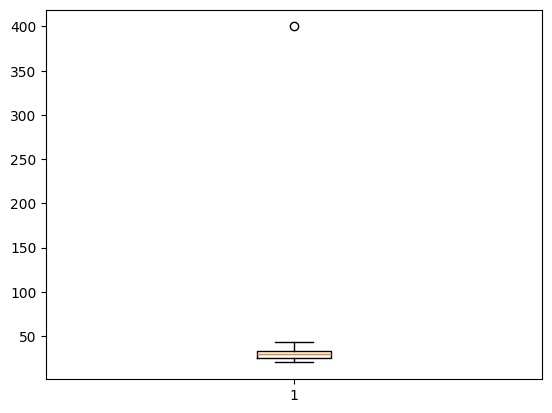

In [ ]:
#mostrando outlier da lista no grafico boxplot
plt.boxplot(lista_idades)

{'whiskers': [<matplotlib.lines.Line2D at 0x77fd680bc490>,
 'caps': [<matplotlib.lines.Line2D at 0x77fd680bd890>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fd6807fb10>],
 'medians': [<matplotlib.lines.Line2D at 0x77fd680bed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fd680bf6d0>],
 'means': []}

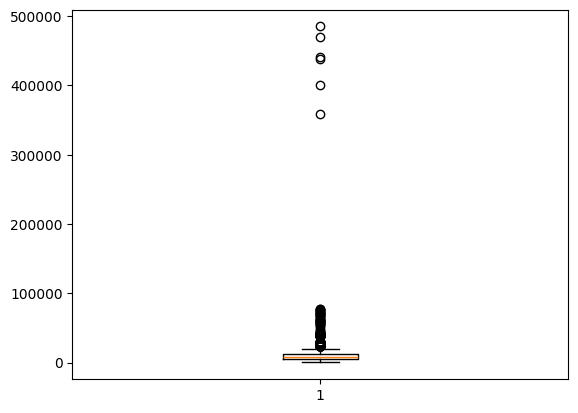

In [ ]:
#Mostrando os outliers da coluna salario no grafico BoxPlot:
plt.boxplot(dados['SALARIO'])

In [ ]:
#Calculando quartil de 25% da coluna
Q1 = dados['SALARIO'].quantile(0.25)
Q1

np.float64(4751.5)

In [ ]:
#Calculando quartil de 75% da coluna
Q3 = dados['SALARIO'].quantile(0.75)
Q3

np.float64(11794.5)

In [ ]:
#Calculando IQR (regra dos quartis)
IQR = Q3-Q1
IQR

np.float64(7043.0)

In [ ]:
#Calculo do limite superior usando regra dos quartis(ler texto abaixo):
lim_superior = Q3 + (1.5*IQR)
lim_superior

np.float64(22359.0)

In [ ]:
#Calculo do limite superior usando regra dos quartis(Ler texto abaixo):
lim_inferior = Q1 - (1.5*IQR)
lim_inferior

np.float64(-5813.0)

In [ ]:
#Mostrando a contagem de pessoas por faixa salarial:
dados['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
de R$ 8.001/m√™s a R$ 12.000/m√™s     752
de R$ 4.001/m√™s a R$ 6.000/m√™s      584
de R$ 6.001/m√™s a R$ 8.000/m√™s      527
de R$ 12.001/m√™s a R$ 16.000/m√™s    437
de R$ 3.001/m√™s a R$ 4.000/m√™s      303
de R$ 2.001/m√™s a R$ 3.000/m√™s      285
de R$ 16.001/m√™s a R$ 20.000/m√™s    229
de R$ 1.001/m√™s a R$ 2.000/m√™s      216
de R$ 20.001/m√™s a R$ 25.000/m√™s    134
de R$ 25.001/m√™s a R$ 30.000/m√™s     77
de R$ 30.001/m√™s a R$ 40.000/m√™s     70
Acima de R$ 40.001/m√™s               45
Menos de R$ 1.000/m√™s                35
Name: count, dtype: int64

In [ ]:
#Criando variavel que vai receber a m√©dia(mean) da coluna SALARIO
media_salario = dados['SALARIO'].mean()
media_salario

np.float64(10517.53348162023)

In [ ]:
#Criando variavel que vai receber o desvio padr√£o(std) da coluna SALARIO:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.210989118474

In [ ]:
#Criando variavel que vai receber o valor do limite superior usando a regra dos quartis(ler texto abaixo):
limite_superior = media_salario + (3*desvio_salario)
limite_superior

np.float64(64806.16644897565)

Calculamos a m√©dia e o desvio padr√£o dos sal√°rios com **mean()** e **std()**, usando media_salario e desvio_salario, respectivamente. Definimos o limite superior como media_salario + (3*desvio_salario), resultando em 64,806.16, um valor adequado para outliers.

Ap√≥s identificar os outliers, decidimos se os remover√≠amos ou substituir√≠amos. No nosso caso, verificamos a faixa salarial e substitu√≠mos sal√°rios discrepantes pela m√©dia da faixa correspondente, garantindo coer√™ncia.‚úÖ

In [ ]:
#Criando filtro para saber quantas pessoas recebem salarios acima do nivel superior (outliers)
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
Acima de R$ 40.001/m√™s              19
de R$ 30.001/m√™s a R$ 40.000/m√™s     3
Name: count, dtype: int64

In [ ]:
#Criando filtro para calcular a m√©dia(mean) dos salarios na faixa de 30 a 40 mil, mas que n√£o sejam outliers:
media_30_40 = dados[(dados['FAIXA SALARIAL']=='de R$ 30.001/m√™s a R$ 40.000/m√™s') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_30_40

np.float64(39002.19402985075)

In [ ]:
#Criando filtro para localizar os outliers que recebem salario acima do limite superior e atribuindo a media_30_40 √† eles para substituir e tratar:
dados.loc[(dados['FAIXA SALARIAL']=='de R$ 30.001/m√™s a R$ 40.000/m√™s') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_30_40

In [ ]:
#Ao aplicar novamente o filtro para saber quantas pessoas recebem salario acima do limite superior, veremos que os 3 outliers foram tratados:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
Acima de R$ 40.001/m√™s    19
Name: count, dtype: int64

In [ ]:
#Criando filtro para calcular a m√©dia(mean) dos salarios acima de 40mil, mas que n√£o sejam outliers:
media_40 = dados[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/m√™s') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_40

np.float64(53127.846153846156)

In [ ]:
#Criando filtro para localizar os outliers que recebem salario acima do limite superior e atribuindo a media_40 √† eles para substituir e tratar:
dados.loc[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/m√™s') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_40

In [ ]:
#Ao aplicar novamente o filtro para saber quantas pessoas recebem salario acima do limite superior, veremos que todos os outliers foram tratados:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

Series([], Name: count, dtype: int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x77fd67f14910>,
 'caps': [<matplotlib.lines.Line2D at 0x77fd67f1d5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fd67f17b50>],
 'medians': [<matplotlib.lines.Line2D at 0x77fd67f1ea10>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fd67f1f2d0>],
 'means': []}

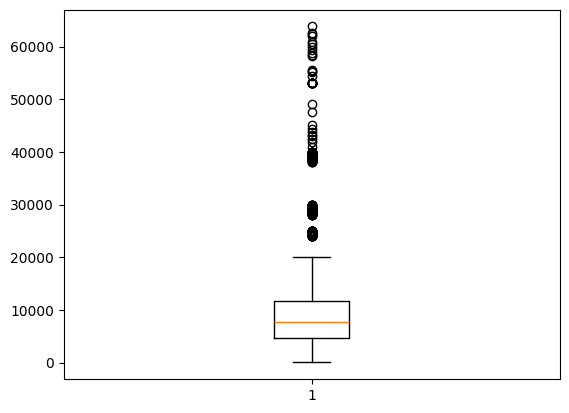

In [ ]:
#Verificando no grafico BoxPlot os valores j√° tratados:
plt.boxplot(dados['SALARIO'])

# Distribui√ß√£o amostral e Intervalo de confian√ßa

‚û°Ô∏èM√©dia Amostral:

Calculamos a m√©dia dos sal√°rios na nossa amostra. Isso nos d√° uma estimativa do sal√°rio m√©dio na popula√ß√£o.

‚û°Ô∏èDesvio Padr√£o Amostral:

Calculamos o desvio padr√£o dos sal√°rios na nossa amostra. O desvio padr√£o nos mostra o quanto os sal√°rios variam em rela√ß√£o √† m√©dia amostral.

‚û°Ô∏èErro Padr√£o:

O erro padr√£o √© calculado dividindo o desvio padr√£o da amostra pela raiz quadrada do tamanho da amostra. Ele nos ajuda a entender a precis√£o da nossa m√©dia amostral como uma estimativa da m√©dia populacional.

‚û°Ô∏èIntervalo de Confian√ßa de 95%:

Calculamos o intervalo de confian√ßa para um n√≠vel de 95% de confian√ßa. Isso significa que, se repet√≠ssemos esse processo muitas vezes, 95% das vezes o intervalo conteria a verdadeira m√©dia populacional.

Nosso intervalo de confian√ßa calculado foi de 9618 a 10105. O intervalo de confian√ßa de 95% entre 9618 e 10105 significa que estamos 95% confiantes de que a verdadeira m√©dia salarial da popula√ß√£o est√° entre 9618 e 10105. Em outras palavras, se colet√°ssemos muitas amostras diferentes e calcul√°ssemos intervalos de confian√ßa para cada uma, esperamos que 95% desses intervalos contenham a verdadeira m√©dia salarial.

‚û°Ô∏èImport√¢ncia do Intervalo de Confian√ßa:

Precis√£o: O intervalo de confian√ßa nos d√° uma faixa dentro da qual acreditamos que a m√©dia populacional se encontra, tornando nossa estimativa mais informativa do que uma √∫nica m√©dia amostral.

Incerteza: Reconhece a incerteza inerente √† amostragem e nos d√° uma ideia de quanto essa incerteza pode ser.

In [ ]:
#atribuindo valores da coluna salario √† vari√°vel salarios
salarios = dados['SALARIO']
salarios

0       11194.0
1        4695.0
2       14202.0
3       15463.0
4        7733.0
         ...   
4266     4329.0
4267     3758.0
4268    19607.0
4269      989.0
4270     3079.0
Name: SALARIO, Length: 4271, dtype: float64

In [ ]:
#calculando m√©dia dos salarios e atribuindo √† vari√°vel
media_amostral = np.mean(salarios)
media_amostral

np.float64(9904.390109813306)

In [ ]:
#calculando desvio padr√£o dos salarios e atribuindo √† vari√°vel
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579343

In [ ]:
#estabelecendo vari√°vel e atribuindo valor
nivel_confianca = 0.95

In [ ]:
#mostrando quantidade de valores na vari√°vel e atribuindo √† vari√°vel
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [ ]:
#calculando erro padr√£o com fun√ß√£o stats.sem
erro_padrao = stats.sem(salarios)
erro_padrao

np.float64(127.11109872023638)

In [ ]:
#Calculando intervalo de confian√ßa com fun√ß√£o stats.t.interval
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(np.float64(9655.186295869078), np.float64(10153.593923757535))

# Feature Engeneering

Nesta aula, abordamos o conceito de feature engineering, que √© o processo de criar novas vari√°veis a partir dos dados existentes para melhorar a an√°lise e a modelagemüòç

‚û°Ô∏èCriamos a coluna "NOVO_NIVEL":

Criamos uma fun√ß√£o chamada preencher_nivel que atribui o valor "Pessoa Gestora" se a coluna "GESTOR" for igual a 1; caso contr√°rio, mant√©m o valor da coluna "NIVEL". Adicionamos essa nova coluna ao nosso DataFrame para diferenciar claramente entre gestores e outros n√≠veis.

‚û°Ô∏èConvers√£o de Vari√°veis Categ√≥ricas:

Utilizamos pd.get_dummies para transformar a coluna "NIVEL" em vari√°veis dummy. Isso √© √∫til para modelos de machine learning que requerem dados num√©ricos.

‚û°Ô∏èCria√ß√£o da Coluna "GERA√á√ÉO":

Desenvolvemos uma fun√ß√£o chamada determinar_geracao para categorizar os indiv√≠duos em diferentes gera√ß√µes (Gera√ß√£o X, Millennial, Gera√ß√£o Z) com base na idade. Adicionamos essa nova coluna ao DataFrame, permitindo an√°lises segmentadas por faixa et√°ria.

In [ ]:
# Criando fun√ß√£o para receber os dados da coluna gestor e da coluna nivel retornando se a pessoa √© gestora ou possui outro nivel
def preencher_nivel(gestor,nivel):
  if gestor == 1:
    return 'Pessoa Gestora'
  else:
    return nivel

In [ ]:
#Aplicando fun√ß√£o usando fun√ß√£o apply da biblioteca Pandas
dados['NOVO NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [ ]:
#contando valores da coluna novo nivel
dados['NOVO NIVEL'].value_counts()

NOVO NIVEL
Pleno             1060
J√∫nior            1023
S√™nior             898
Pessoa Gestora     713
Name: count, dtype: int64

In [ ]:
#mostrando  a coluna nivel
dados['NIVEL']

0       J√∫nior
1          NaN
2        Pleno
3       S√™nior
4        Pleno
         ...  
4266     Pleno
4267     Pleno
4268       NaN
4269    J√∫nior
4270    J√∫nior
Name: NIVEL, Length: 4271, dtype: object

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', '√ÅREA DE FORMA√á√ÉO',
       'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL'],
      dtype='object')

In [ ]:
#Usando fun√ß√£o get_dummies para criar novas colunas indicando para cada nivel se √© true ou false (transforma valores categoricos em variavel booleana)
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', '√ÅREA DE FORMA√á√ÉO',
       'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_J√∫nior', 'NIVEL_Pleno', 'NIVEL_S√™nior'],
      dtype='object')

In [ ]:
#criando fun√ß√£o para determinar gera√ß√£o baseado na idade
def determinar_geracao(idade):
  if 39<idade<=58:
    return 'Gera√ß√£o X'
  elif 29<idade<=39:
    return 'Millennial'
  elif 13<idade<=29:
    return 'Gera√ß√£o Z'
  else:
    return 'Outra Gera√ß√£o'

In [ ]:
#aplicando fun√ß√£o criada na coluna idade e atribuindo a uma nova vari√°vel(coluna gera√ß√£o)
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
#mostrando a contagem de valores na coluna gera√ß√£o
dados['GERACAO'].value_counts()

GERACAO
Gera√ß√£o Z     1999
Millennial    1761
Gera√ß√£o X      511
Name: count, dtype: int64

Dando continuidade:

‚û°Ô∏èIdentifica√ß√£o de Inten√ß√£o de Mudan√ßa de Emprego:

Criamos duas novas colunas, "EM_BUSCA" e "ABERTO_OPORTUNIDADES", a partir das respostas √† pergunta sobre a inten√ß√£o de mudar de emprego nos pr√≥ximos 6 meses. Utilizamos fun√ß√µes de string para identificar se os respondentes est√£o "em busca" ou "abertos" a novas oportunidades, facilitando a an√°lise do mercado de trabalho.



In [ ]:
#importando segunda tabela para mergear com a primeira
dados2 = pd.read_excel('/content/drive/MyDrive/Curso Programaria/CoÃÅpia de Planilha_Aula_parte2.xlsx')

In [ ]:
#mostrando primeiras linhas da tabela dados2
dados2.head()

ID  \
0  zzqzz3l9ily8nuo2m7wyzzqzz3w48o96   
1  zzls2oftfn9law393oezzls2ofhvfpzd   
2  zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi   
3  zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl   
4  zzaf1m95yan929rb94wzzaf1mekhvhpg   

  Quanto tempo de experi√™ncia na √°rea de dados voc√™ tem?  \
0                                      de 1 a 2 anos       
1                                      de 3 a 4 anos       
2                                      de 3 a 4 anos       
3                                      de 4 a 6 anos       
4             N√£o tenho experi√™ncia na √°rea de dados       

  Quanto tempo de experi√™ncia na √°rea de TI/Engenharia de Software voc√™ teve antes de come√ßar a trabalhar na √°rea de dados?  \
0                                     de 7 a 10 anos                                                                          
1                                     Menos de 1 ano                                                                          
2                                    Mais de 10 anos                                                                          
3  N√£o tive experi√™ncia na √°rea de TI/Engenharia ...                                                                          
4                                    Mais de 10 anos                                                                          

  Voc√™ est√° satisfeito na sua empresa atual?  \
0                                       True   
1                                      False   
2                                      False   
3                                       True   
4                                      False   

  Qual o principal motivo da sua insatisfa√ß√£o com a empresa atual?  \
0                                                NaN                 
1  Falta de oportunidade de crescimento no empreg...                 
2  Falta de oportunidade de crescimento no empreg...                 
3                                                NaN                 
4  Falta de oportunidade de crescimento no empreg...                 

  Voc√™ participou de entrevistas de emprego nos √∫ltimos 6 meses?  \
0  N√£o participei de entrevistas de emprego/proce...               
1          Sim, fiz entrevistas mas n√£o fui aprovado               
2  N√£o participei de entrevistas de emprego/proce...               
3               Sim, fui aprovado e mudei de emprego               
4  N√£o participei de entrevistas de emprego/proce...               

  Voc√™ pretende mudar de emprego nos pr√≥ximos 6 meses?  \
0  N√£o estou buscando e n√£o pretendo mudar de emp...     
1  Estou em busca de oportunidades dentro ou fora...     
2  N√£o estou buscando, mas me considero aberto a ...     
3  N√£o estou buscando, mas me considero aberto a ...     
4  N√£o estou buscando, mas me considero aberto a ...     

  Quais os principais crit√©rios que voc√™ leva em considera√ß√£o no momento de decidir onde trabalhar?  \
0                                         Benef√≠cios                                                  
1  Remunera√ß√£o/Sal√°rio, Plano de carreira e oport...                                                  
2  Remunera√ß√£o/Sal√°rio, Flexibilidade de trabalho...                                                  
3  Remunera√ß√£o/Sal√°rio, Flexibilidade de trabalho...                                                  
4  Remunera√ß√£o/Sal√°rio, Oportunidade de aprendiza...                                                  

            Atualmente qual a sua forma de trabalho?  \
0                             Modelo 100% presencial   
1                             Modelo 100% presencial   
2  Modelo h√≠brido com dias fixos de trabalho pres...   
3  Modelo h√≠brido flex√≠vel (o funcion√°rio tem lib...   
4                             Modelo 100% presencial   

           Qual a forma de trabalho ideal para voc√™?  \
0  Modelo h√≠brido com dias fixos de trabalho pres...   
1  Modelo h√≠brido flex√≠vel (o funcion√°rio tem lib...   
2  Modelo h√≠brido flex√≠

In [ ]:
#Mergeando ambas as tabelas apartir do dado 'ID' e posicionando os novos dados √† esquerda dos anteriores
dados = dados.merge(dados2, on = 'ID', how = 'left')

In [ ]:
#visualizando colunas da tabela mergeada
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', '√ÅREA DE FORMA√á√ÉO',
       'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_J√∫nior', 'NIVEL_Pleno', 'NIVEL_S√™nior',
       'GERACAO', 'Quanto tempo de experi√™ncia na √°rea de dados voc√™ tem?',
       'Quanto tempo de experi√™ncia na √°rea de TI/Engenharia de Software voc√™ teve antes de come√ßar a trabalhar na √°rea de dados?',


In [ ]:
#contando valores da coluna
dados['Voc√™ pretende mudar de emprego nos pr√≥ximos 6 meses?'].value_counts()

Voc√™ pretende mudar de emprego nos pr√≥ximos 6 meses?
N√£o estou buscando, mas me considero aberto a outras oportunidades         1354
Estou em busca de oportunidades dentro ou fora do Brasil                   1011
N√£o estou buscando e n√£o pretendo mudar de emprego nos pr√≥ximos 6 meses     978
Estou em busca de oportunidades, mas apenas fora do Brasil                  353
Name: count, dtype: int64

In [ ]:
#Refinando dados de quem est√° em busca de emprego usando m√©todo de localiza√ß√£o de string que contenha o dado informado
dados['EM BUSCA'] = dados['Voc√™ pretende mudar de emprego nos pr√≥ximos 6 meses?'].str.contains('em busca', case = False)

In [ ]:
#contando valores da coluna
dados['EM BUSCA'].value_counts()

EM BUSCA
False    2332
True     1364
Name: count, dtype: int64

In [ ]:
#Refinando dados de quem est√° aberto a oportunidades usando o mesmo m√©todo supracitado
dados['ABERTO A OPORTUNIDADES'] = dados['Voc√™ pretende mudar de emprego nos pr√≥ximos 6 meses?'].str.contains('aberto', case = False)

In [ ]:
#contando valores da coluna
dados['ABERTO A OPORTUNIDADES'].value_counts()

ABERTO A OPORTUNIDADES
False    2342
True     1354
Name: count, dtype: int64

In [ ]:
#contando valores da coluna
dados['COR/RACA/ETNIA'].value_counts()

COR/RACA/ETNIA
Branca                  2746
Parda                   1054
Preta                    291
Amarela                  128
Prefiro n√£o informar      26
Outra                     17
Ind√≠gena                  11
Name: count, dtype: int64

In [ ]:
#Resolvendo o desafio (criar nova coluna etnia)
dados['BRANCOS'] = dados['COR/RACA/ETNIA'].str.contains('Branca', case = False)

In [ ]:
#contando quantos responderam que s√£o brancos na coluna etnia
dados['BRANCOS'].value_counts()

BRANCOS
True     2746
False    1527
Name: count, dtype: int64

#Correla√ß√£o
A correla√ß√£o nos diz se e como duas vari√°veis est√£o relacionadas.
Existem dois tipos principais de correla√ß√£o: positiva e negativa.

‚û°Ô∏èA correla√ß√£o positiva ocorre quando duas vari√°veis aumentam juntas.

Por exemplo, quanto mais um aluno estuda, maior √© seu desempenho acad√™mico.

‚û°Ô∏èJ√° a correla√ß√£o negativa acontecia quando uma vari√°vel aumenta enquanto a outra diminui.

üìåA fun√ß√£o de correla√ß√£o mais usada √© a de Pearson, que varia de -1 a 1. Um valor pr√≥ximo de 1 indica uma forte correla√ß√£o positiva, pr√≥ximo de -1 indica uma forte correla√ß√£o negativa, e pr√≥ximo de 0 indica que n√£o h√° uma rela√ß√£o linear.

Por exemplo, ao calcular a correla√ß√£o entre horas de estudo e desempenho acad√™mico, um coeficiente de 0.8 indica uma correla√ß√£o positiva forte.

No nosso caso, calculamos a correla√ß√£o entre idade e sal√°rio usando a fun√ß√£o corr do pandas. Obtivemos um valor de 0.29, indicando uma correla√ß√£o positiva, mas n√£o muito forte.

Entender a correla√ß√£o ajuda a evitar suposi√ß√µes.

Por exemplo, esper√°vamos que a idade fosse um fator importante para o aumento salarial, mas nossos dados mostram que, apesar de ter uma rela√ß√£o, n√£o √© t√£o forte. Para identificar correla√ß√µes em tabelas com muitas colunas de valores cont√≠nuos, utilizamos mapas de calor.

Um exemplo de mapa de calor permite visualizar rapidamente a correla√ß√£o entre vari√°veis cont√≠nuas, com cores indicando a for√ßa da correla√ß√£o.

üìåTamb√©m calculamos a correla√ß√£o entre vari√°veis discretas usando o coeficiente de Cram√©r.

Criamos uma fun√ß√£o cramer_coeficiente para calcular este coeficiente, utilizando a tabela cruzada gerada com crosstab do pandas e a fun√ß√£o chi2_contingency da biblioteca stats.

Aplicamos essa fun√ß√£o para verificar a rela√ß√£o entre cor/ra√ßa/etnia e n√≠vel de ensino, obtendo um coeficiente de 0.044, indicando quase nenhuma rela√ß√£o. Este resultado sugere que, na nossa amostra, etnias diferentes t√™m n√≠veis de ensino semelhantes, possivelmente devido ao contexto da √°rea de TI, onde a maioria j√° tem algum tipo de forma√ß√£o.

In [ ]:
#calculando correla√ß√£o entre a coluna idade e coluna salario usando fun√ß√£o corr e atribuindo a vari√°vel
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

np.float64(0.2902441968622099)

In [ ]:
#criando fun√ß√£o para calcular coeficiente de cramer
def cramer_coeficiente(coluna1,coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1,coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
#calculando coeficiente de cramer entre coluna etnia e coluna nivel de ensino para entender a correla√ß√£o entre as duas
cramer_coeficiente(dados['COR/RACA/ETNIA'],dados['NIVEL DE ENSINO'])

np.float64(0.04499106580480143)

In [ ]:
#criando tabela crusada com fun√ß√£o Pandas crosstab associando dados das colunas etnia e nivel de ensino e atribuindo a vari√°vel
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'],dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO       Doutorado ou Phd  Estudante de Gradua√ß√£o  \
COR/RACA/ETNIA                                                   
Amarela                              7                      15   
Branca                             127                     365   
Ind√≠gena                             0                       2   
Outra                                0                       0   
Parda                               50                     178   
Prefiro n√£o informar                 1                       2   
Preta                                6                      51   

NIVEL DE ENSINO       Gradua√ß√£o/Bacharelado  Mestrado  \
COR/RACA/ETNIA                                          
Amarela                                  50        14   
Branca                                  999       355   
Ind√≠gena                                  4         2   
Outra                                     6         3   
Parda                                   333       113   
Prefiro n√£o informar                     14         1   
Preta                                   104        33   

NIVEL DE ENSINO       N√£o tenho gradua√ß√£o formal  Prefiro n√£o informar  \
COR/RACA/ETNIA                                                           
Amarela                                        2                     0   
Branca                                        65                     8   
Ind√≠gena                                       0                     0   
Outra                                          1                     0   
Parda                                         33                     3   
Prefiro n√£o informar                           0                     1   
Preta                                          9                     0   

NIVEL DE ENSINO       P√≥s-gradua√ß√£o  
COR/RACA/ETNIA                       
Amarela                          40  
Branca                          827  
Ind√≠gena                          3  
Outra                             7  
Parda                           344  
Prefiro n√£o informar              7  
Preta                            88

In [ ]:
#mostrando valores da tabela cruzada em formato array
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

In [ ]:
#Desafio
cramer_coeficiente(dados['NIVEL DE ENSINO'],dados['GENERO'])

np.float64(0.076119232802818)

In [ ]:
tabela_cruzada = pd.crosstab(dados['NIVEL DE ENSINO'],dados['GENERO'])
tabela_cruzada

GENERO                      Feminino  Masculino  Prefiro n√£o informar
NIVEL DE ENSINO                                                      
Doutorado ou Phd                  57        134                     0
Estudante de Gradua√ß√£o           104        506                     3
Gradua√ß√£o/Bacharelado            365       1138                     7
Mestrado                         133        386                     2
N√£o tenho gradua√ß√£o formal        24         86                     0
Prefiro n√£o informar               3          8                     1
P√≥s-gradua√ß√£o                    372        936                     8

In [ ]:
#salvando todas as modifica√ß√µes em um novo arquivo do tipo CSV na pasta do drive
dados.to_csv('/content/drive/MyDrive/Curso Programaria/Analise_de_Dados.csv', index = False)

#Banco de dados

‚û°Ô∏èO que √© esse tal de banco de dados?

Um sistema projetado para organizar, armazenar e gerenciar dados de maneira eficiente, facilitando o acesso, a gest√£o e a atualiza√ß√£o dessas informa√ß√µes.
Como um arm√°rio digital onde voc√™ guarda informa√ß√µes de modo organizado.

‚û°Ô∏èQuais os tipos de bancos de dados que existem e para que servem cada um? Ô∏è

**Bancos de dados relacionais:**

Estrutura bem definida e tabelas com rela√ß√µes entre si.
Ideal para dados estruturados e relacionamentos complexos.

*  Exemplos de banco: mySQL, PostgreSQL, Oracle

*  Exemplos de usos: WordPress, Drupal, Shopify, Magento.

**Bancos de dados n√£o relacionais:**

Estrutura mais flex√≠vel e podem lidar com dados n√£o estruturados.
Ideal para grandes volumes de dados n√£o estruturados e alta escalabilidade.

*  Exemplos de banco: MongoDB, Cassandra, Redis

*  Exemplos de uso: Facebook, Twitter, jogos online e m√≥veis.

Podemos ter tamb√©m aplica√ß√µes que misturam os bancos! Nesse curso vamos focar em bancos relacionais viu!

‚û°Ô∏èComo os bancos relacionais organizam os dados de maneira eficiente?

Atrav√©s de estruturas tabulares, onde os dados s√£o organizados em tabelas com linhas e colunas.
Cada tabela representa uma entidade (tipo de informa√ß√£o) e cada linha representa uma inst√¢ncia (registro) dessa entidade.
As colunas representam os atributos (caracter√≠sticas) de cada entidade.
Banco de dados √© muito importante para analistas de dados, pois a maioria dos dados corporativos estar√£o em banco de dados e precisar√£o consult√°-los para fazer as an√°lises. Aqui no curso, utilizaremos para juntar uma pequena parte de bases externas aos nossos dados.

#Introdu√ß√£o ao  SQL

‚û°Ô∏èO que √© SQL?

SQL (*Structured Query Language*) √© a linguagem padr√£o para gerenciar e manipular dados em bancos de dados relacionais.
Imagine o SQL como um tradutor m√°gico que permite conversar com o banco de dados, extraindo e organizando informa√ß√µes.

‚û°Ô∏èTipos de comandos SQL:

**DDL (Data Definition Language):** Linguagem de Defini√ß√£o - Cria, modifica e exclui tabelas no banco de dados.

Ex: CREATE TABLE, ALTER TABLE, DROP TABLE

**DML (Data Manipulation Language):** Linguagem de Manipula√ß√£o - Insere, atualiza, consulta e remove dados das tabelas.

Ex: SELECT, INSERT, UPDATE, DELETE

**DCL (Data Control Language):** Linguagem de Controle - Controla permiss√µes de acesso e seguran√ßa no banco de dados.

Ex: GRANT, REVOKE

üìåNas pr√≥ximas aulas focaremos em DML, pois ele  √© essencial para o dia a dia do analista de dados, pois permite extrair informa√ß√µes relevantes para an√°lises. O comando SELECT √© o principal para realizar consultas no banco de dados. Mas nesta aula vimos um pouco de DDL, para aprender o b√°sico de cria√ß√£o de tabelas.

**Exemplo pr√°tico:** Utilizamos o DBeaver, que √© uma ferramenta visual de banco de dados, para criar tabelas de an√°lise de munic√≠pios brasileiros:

Criamos as tabelas Municipios_Brasileiros, Municipio_Status e Gerencia_Regiao com seus respectivos relacionamentos.
Para relembrar a estrutura b√°sica para criar tabelas √©:

CREATE TABLE (NOME DA TABELA)

(

(NOME DO CAMPO) (TIPO DE CAMPO) (RESTRICOES),
‚Ä¶

);


‚ñ∂Ô∏èO nome da tabela √© de livre escolha, mas evitamos usar caracteres especiais, o mesmo vale para o nome do campo e podemos criar tantos campos quantos forem necess√°rios.

‚ñ∂Ô∏èVimos na aula os campos do tipo: Integer, Varchar e Blob, mas existem v√°rios outros tipos que podemos utilizar.

‚ñ∂Ô∏èAs restri√ß√µes vimos a NOT NULL, que diz que o campo n√£o pode ser nulo, ou seja, sempre que for criado um registro novo √© preciso passar algum valor para esse campo.

‚ñ∂Ô∏èTamb√©m vimos como definir a chave prim√°ria, utilizando as palavras PRIMARY KEY na frente da linha do campo definido, depois do not null.

‚ñ∂Ô∏èTamb√©m vimos como utilizar o comando AUTOINCREMENT, que define que o campo n√£o precisa ser preenchido, mas receber√° um valor incremental a cada novo registro.

‚ñ∂Ô∏èPor fim, aprendemos a definir a chave estrangeira na tabela. Adicionando antes de fechar o parenteses do CREATE TABLE o seguinte:

CONSTRAINT (nome_da_restricao) FOREIGN KEY ("COLUNA NA TABELA ATUAL") REFERENCES "TABELA ESTRANGEIRA" ("COLUNA NA TABELA ESTRANGEIRA")

* Links para estudo complementar:

  https://www.alura.com.br/artigos/o-que-e-sql

  https://www.dio.me/articles/tipos-de-linguagem-sql

  https://dbeaver.com/docs/dbeaver/New-Table-Creation/

  https://awari.com.br/passo-a-passo-aprenda-como-criar-tabelas-no-sql-e-organize-seus-dados-de-forma-eficiente/


‚û°Ô∏èComandos b√°sicos:

**Adicionando uma coluna:** Criar uma nova coluna na tabela municipios_brasileiros" usando o comando ALTER TABLE seguido do nome da tabela, ADD COLUMN e o nome da nova coluna (por exemplo, "pais").

**Alterando uma coluna:** Atualizar a tabela "municipios_brasileiro" com o comando UPDATE, definir o valor da coluna "pais" para "Brasil" usando o comando SET e filtrar as linhas com o comando WHERE.

**Alterando uma coluna:** Eliminar a coluna "pais" da tabela "municipios_brasileiros" usando o comando ALTER TABLE, seguido do nome da tabela e DROP COLUMN e o nome da coluna.

**Selecionando dados:** Extrair dados espec√≠ficos com o comando SELECT, seguido das colunas e da tabela. Use o caractere * para selecionar todas as colunas.

‚û°Ô∏èAprofundando no SELECT:

* Utilize o comando WHERE seguido da condi√ß√£o para filtrar os resultados.

  Exemplo: selecionar cidades com nome "Itaquaquecetuba":

 SELECT * FROM municipios_brasileiros WHERE Cidade = 'Itaquaquecetuba';

* Utilize o operador LIKE para consultas com texto parcial.

  Exemplo: selecionar cidades com nome iniciando por "Itaqua":

  SELECT * FROM municipios_brasileiros WHERE Cidade LIKE 'Itaqua%';

* Utilize operadores como >, <, >=, <= e != para filtrar resultados num√©ricos.

  Exemplo: selecionar munic√≠pios com popula√ß√£o superior a 50.000 habitantes:

  SELECT municipio_ID, populacao_residente FROM municipio_status WHERE populacao_residente>50000;


‚û°Ô∏èJOIN: Serve para juntar tabelas nos nossos dados, podemos usar ele v√°rias vezes nas nossas consultas, juntando v√°rias tabelas de uma vez. Por√©m temos que nos atentar sobre quais registros queremos trazer de cada tabela, entendendo bem os tipos de join existentes:

**INNER JOIN:** Combina linhas com correspond√™ncias em ambas as tabelas.

**RIGHT JOIN:** Retorna todos os registros da direita e os da esquerda com correspond√™ncia.

**LEFT JOIN:** Retorna todos os registros da esquerda e os da direita com correspond√™ncia.

**FULL JOIN:** Retorna todos os registros de ambas as tabelas, com ou sem correspond√™ncia.

‚û°Ô∏èGROUP BY: Serve para agrupa linhas por uma coluna espec√≠fica, resumindo os dados. Perfeito para contagem, soma e m√©dia por grupos.

‚û°Ô∏èORDER BY: Ordena os resultados da consulta em ordem crescente ou decrescente. Ideal para visualizar os maiores ou menores valores.
Vamos lembrar duas queries que fizemos em aula com esses comandos:

üìåExemplo Pr√°tico:

**Desvendando a Popula√ß√£o por Cidade:**

* Selecionamos as colunas Cidade e populacao_residente.
Juntamos as tabelas municipios_brasileiros e Municipios_Status usando INNER JOIN.

  A query ficou assim:

  SELECT municipios_brasileiros.Cidade, Municipios_Status.populacao_residente
FROM municipios_brasileiros  INNER JOIN Municipios_Status ON municipios_brasileiros.municipio_ID = Municipios_Status.municipio_ID

**Vendo os Estados com mais cidades:**

* Selecionamos as colunas Estado e cidade, por√©m usamos o agregador de COUNT na coluna cidade.
Agrupamos por Estado usando GROUP BY.
Ordenamos por COUNT(Cidade) em ordem decrescente com ORDER BY.

  A query ficou assim:

  SELECT Estado, COUNT(Cidade)
FROM municipios_brasileiros  
GROUP BY Estado
ORDER BY 2 DESC ;

E com isso descobrimos que o estado com mais cidades √© Minas Gerais!

üìåDicas Extras:
Explore os diferentes tipos de JOIN para escolher o ideal para sua necessidade.
Use fun√ß√µes de agrega√ß√£o como COUNT(), SUM(), AVG() e MAX() para resumir dados agrupados.
Combine ORDER BY com fun√ß√µes de agrega√ß√£o para visualizar os maiores ou menores valores em cada grupo.
Pratique bastante para se tornar um mestre em JOIN, GROUP BY e ORDER BY!

#Conectando SQL ao Pandas

‚û°Ô∏èPara fazer a  conex√£o com o banco de dados SQLite, utilizamos a biblioteca sqlite3, ent√£o fizemos o import dela: import sqlite3

‚û°Ô∏èA fun√ß√£o connect() do sqlite3 foi utilizada para estabelecer a conex√£o, passando o caminho do arquivo do banco de dados como par√¢metro.


In [ ]:
#importando sqlite3
import sqlite3

In [ ]:
#importando banco de dados do DBEAVER e atribuindo o arquivo a variavel
conexao = sqlite3.connect('/content/drive/MyDrive/Curso Programaria/status_brasil')

In [ ]:
#atribuindo fun√ß√£o SELECT do sql a variavel para teste
quary = 'SELECT * FROM municipios_brasileiros WHERE Cidade="Itaquaquecetuba";'
quary

'SELECT * FROM municipios_brasileiros WHERE Cidade="Itaquaquecetuba";'

In [ ]:
#usando fun√ß√£o do pandas para ler dado
pd.read_sql(quary, con=conexao)

Cidade Estado   Regiao  Municipio_ID
0  Itaquaquecetuba     SP  Sudeste          5043

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Curso Programaria/Analise_de_Dados.csv')

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', '√ÅREA DE FORMA√á√ÉO',
       'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_J√∫nior', 'NIVEL_Pleno', 'NIVEL_S√™nior',
       'GERACAO', 'Quanto tempo de experi√™ncia na √°rea de dados voc√™ tem?',
       'Quanto tempo de experi√™ncia na √°rea de TI/Engenharia de Software voc√™ teve antes de come√ßar a trabalhar na √°rea de dados?',


In [ ]:
#criando variavel que vai receber lista de estados unicos relatados na tabela dados, coluna 'UF ONDE MORA'
lista_estados = list(dados['UF ONDE MORA'].unique())

#Explica√ß√£o detalhada da fun√ß√£o

‚û°Ô∏èPara o SQL entender que estamos passando valores vindos de fora, precisamos concatenar interroga√ß√µes (?) no lugar onde ficariam os nossos estados.

‚û°Ô∏èEntendida essa parte, a consulta SQL foi armazenada em uma string e, em seguida, executada no banco de dados usando o m√©todo read_sql() do pandas e, a cl√°usula WHERE com o operador IN foi utilizada para filtrar os registros. Algo mais ou menos assim:

query = '''SELECT ‚Ä¶‚Ä¶‚Ä¶.WHERE municipios_brasileiros.Estado IN ({}) GROUP BY municipios_brasileiros.Estado'''.format(', '.join(['?' for _ in lista_estados]))

estados_renda = pd.read_sql(query, con=conexao, params=lista_estados)

‚û°Ô∏èDepois disso fizemos o merge com a nossa tabela original. Lembrando que o how do merge precisa respeitar as mesmas regras de left, right, inner que o JOIN em SQL.

Nosso merge ficou assim:

dados = dados.merge(estados_renda, left_on=‚ÄôUF ONDE MORA‚Äô, right_on='Estado', how='left')

‚û°Ô∏èPor fim, analisamos a correla√ß√£o entre o sal√°rio e o √≠ndice de renda m√©dia do Estado utilizando a fun√ß√£o corr(). Descobrimos que a correla√ß√£o √© positiva, quando maior o √≠ndice, maior o sal√°rio, por√©m baixa, mostrando que s√≥ esse √≠ndice n√£o causa um impacto t√£o grande para o sal√°rio, precisamos analisar juntando outras vari√°veis de import√¢ncia.



In [ ]:
#selecionando estado e media renda por estado da tabela municipios, unindo as duas tabelas e agrupando por estado
quary = '''SELECT municipios_brasileiros.Estado, AVG(Municipio_status.Renda) FROM municipios_brasileiros
        INNER JOIN Municipio_status ON municipios_brasileiros.Municipio_ID = Municipio_status.Municipio_ID
        WHERE municipios_brasileiros.Estado IN ({})
        GROUP BY municipios_brasileiros.Estado;''' .format(','.join(['?'for _ in lista_estados]))
#foi usado a fun√ß√£o .format para linkar a string lista_estados a fun√ß√£o sql  dentro da variavel. Mais informa√ß√µes abaixo

In [ ]:
estados_renda = pd.read_sql(quary, con=conexao, params=lista_estados)

In [ ]:
#vamos mergear as tabelas, para isso √© necess√°rio duas colunas em comum. por isso vamos modificar o nome da coluna 'UF ONDE MORA'
dados.rename(columns={'UF ONDE MORA': 'Estado'}, inplace=True)

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       '√ÅREA DE FORMA√á√ÉO', 'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_J√∫nior', 'NIVEL_Pleno', 'NIVEL_S√™nior',
       'GERACAO', 'Quanto tempo de experi√™ncia na √°rea de dados voc√™ tem?',
       'Quanto tempo de experi√™ncia na √°rea de TI/Engenharia de Software voc√™ teve antes de come√ßar a trabalhar na √°rea de dados?',
       'Voc√™

In [ ]:
#mergeando as tabelas a partir das colunas 'Estado' escolhendo a tabela da esquerda(dados)
dados = dados.merge(estados_renda, on='Estado', how='left')

In [ ]:
correlacao_renda_salario = dados['SALARIO'].corr(dados['AVG(Municipio_status.Renda)'])
correlacao_renda_salario

np.float64(0.12083384881429463)

#Fazendo o exercicio proposto com os dados de educa√ß√£o

In [ ]:
#selecionando esdado e media educa√ß√£o das tabelas, executando JOIN das duas tabelas e agrupando por estado
quary = '''SELECT municipios_brasileiros.Estado, AVG(Municipio_status.Educacao) FROM municipios_brasileiros
        INNER JOIN Municipio_status ON municipios_brasileiros.Municipio_ID = Municipio_status.Municipio_ID
        GROUP BY municipios_brasileiros.Estado;'''

In [ ]:
#lendo a tabela na variavel conexao e aplicando a quary criada acima. o resultado foi atribuido a variavel
estados_educacao = pd.read_sql(quary, con=conexao)
estados_educacao

Estado  AVG(Municipio_status.Educacao)
0      AC                        0.452227
1      AL                        0.442745
2      AM                        0.436935
3      AP                        0.549938
4      BA                        0.481942
5      CE                        0.552120
6      DF                        0.742000
7      ES                        0.591359
8      GO                        0.596167
9      MA                        0.488622
10     MG                        0.556862
11     MS                        0.557410
12     MT                        0.576993
13     PA                        0.448664
14     PB                        0.477788
15     PE                        0.490557
16     PI                        0.456692
17     PR                        0.610985
18     RJ                        0.620075
19     RN                        0.516506
20     RO                        0.516423
21     RR                        0.499200
22     RS                        0.600714
23     SC                        0.636522
24     SE                        0.489733
25     SP                        0.676498
26     TO                        0.545826

In [ ]:
#mergeando a informa√ß√£o obtida com a quary na tabela dados, mantendo a informa√ß√£o a esquerda
dados = dados.merge(estados_educacao, on='Estado', how='left')

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       '√ÅREA DE FORMA√á√ÉO', 'QUAL SUA SITUA√á√ÉO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE DADOS VOC√ä TEM?',
       'QUANTO TEMPO DE EXPERI√äNCIA NA √ÅREA DE TI/ENGENHARIA DE SOFTWARE VOC√ä TEVE ANTES DE COME√áAR A TRABALHAR NA √ÅREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_J√∫nior', 'NIVEL_Pleno', 'NIVEL_S√™nior',
       'GERACAO', 'Quanto tempo de experi√™ncia na √°rea de dados voc√™ tem?',
       'Quanto tempo de experi√™ncia na √°rea de TI/Engenharia de Software voc√™ teve antes de come√ßar a trabalhar na √°rea de dados?',
       'Voc√™

In [ ]:
#aplicando fun√ß√£o corr() para avaliar se h√° correla√ß√£o entre as informa√ß√µes de salario e nivel de educa√ß√£o
correlacao_educacao_salario = dados['SALARIO'].corr(dados['AVG(Municipio_status.Educacao)'])
correlacao_educacao_salario

np.float64(0.15558020288268756)

#Visualiza√ß√£o de dados

A visualiza√ß√£o de dados √© a representa√ß√£o gr√°fica de dados, permitindo a comunica√ß√£o de informa√ß√µes de forma clara e eficiente. √â crucial para analistas de dados pois facilita a compreens√£o de dados por pessoas com diferentes n√≠veis de conhecimento t√©cnico.


---


ü•áVimos duas regras de ouro para uma boa visualiza√ß√£o de dados:

‚û°Ô∏èClareza: O objetivo da visualiza√ß√£o deve ser claro nos primeiros 5 segundos.

‚û°Ô∏èEfici√™ncia: As conclus√µes do gr√°fico devem ser compreendidas em no m√°ximo 10 segundos..

O que significa que √© de extrema import√¢ncia escolher a visualiza√ß√£o adequada para o tipo de dado e para o objetivo da an√°lise. A simplicidade e a clareza s√£o fundamentais para que o p√∫blico compreenda a mensagem transmitida pelo gr√°ficoüìà

Aprendemos tamb√©m dois m√©todos de avalia√ß√£o:

‚û°Ô∏èM√©todo McCandless: Combina 4 elementos para uma boa visualiza√ß√£o:

1- Informa√ß√£o: Os dados em si.

2- Hist√≥ria: A narrativa que se deseja contar com os dados.

4- Objetivo: As conclus√µes que se pretende tirar da visualiza√ß√£o.

5- Visualiza√ß√£o: A escolha do tipo de gr√°fico mais adequado.

√â preciso combinar esses elementos para criar gr√°ficos informativos e engajadores.

‚û°Ô∏èVerifica√ß√£o Trifecta de Junk Charts: Tr√™s perguntas para avaliar a qualidade do gr√°fico:

1- O que estamos tentando responder?

2 - O que o gr√°fico diz?

3 - O que os dados dizem?



Se conseguirmos responder rapidamente e de forma correta essas tr√™s perguntas √© porque a visualiza√ß√£o est√° boa!

Vimos alguns exemplos de gr√°ficos ruins na aula, mas de forma geral podemos resumir que a visualiza√ß√£o de dados deve ser clara, concisa e esteticamente agrad√°vel para transmitir a mensagem de forma eficaz.

‚ö†Ô∏èAh, e lembre-se: √© importante pensar no objetivo da visualiza√ß√£o antes de escolher o tipo de gr√°fico e seus elementos visuais e verificar se nossos dados est√£o adequados e coerentes, parte que fizemos nos m√≥dulos passados.


#Elementos Fundamentais para Gr√°ficos Eficazes

‚û°Ô∏èTipo de Gr√°fico:

Escolha o tipo de gr√°fico que melhor represente seus dados e atenda ao seu objetivo.

**Gr√°fico de Barras:** Ideal para compara√ß√µes, pode ser horizontal ou vertical, simples ou empilhado.

**Gr√°fico de Pizza/Torta/Donut:** √ötil para compara√ß√µes e visualiza√ß√£o de propor√ß√µes, com partes representando percentuais do total. Isso significa que a soma das partes nesses gr√°ficos d√£o 100%

**Gr√°fico de Linha:** Exibe tend√™ncias ao longo do tempo, conectando pontos de dados. Ou seja, o eixo X √© um valor de tempo: uma data, semana, dia m√™s. Mesmo quando n√£o √© temporal, utilizamos com valores num√©ricos que tem alguma ordem, pois a linha √© para continuidade.

**Histograma:** Analisa distribui√ß√µes de dados, mostrando a frequ√™ncia em intervalos.

**Scatter Plot:** Explora rela√ß√µes entre vari√°veis, cada ponto representando um dado.

**Bubble Chart:** Similar ao Scatter Plot, mas com bolhas de tamanhos vari√°veis para representar valores adicionais.

‚û°Ô∏èT√≠tulos e R√≥tulos:

**T√≠tulo Claro e Conciso:** Comunique o objetivo da visualiza√ß√£o de forma direta.

**R√≥tulos nos Eixos:** Identifiquem as vari√°veis representadas nos eixos X e Y.

**R√≥tulos em Outros Elementos:** Esclare√ßam a legenda de cores, formas ou outros elementos do gr√°fico.

‚û°Ô∏èEixos:

**Eixos X e Y:** Representam as vari√°veis dos dados de forma clara e precisa.

**R√≥tulos nos Eixos:** Indispens√°veis para interpretar os dados.

**Escala Apropriada:** Permite a compara√ß√£o correta entre os valores.

‚û°Ô∏èLegenda:

**Identifique Categorias ou S√©ries de Dados:** Diferencie cada elemento do gr√°fico.

**Clareza e Precis√£o:** Utilize descri√ß√µes f√°ceis de entender.

**Posicionamento Adequado:** N√£o obstrua a visualiza√ß√£o dos dados.

‚û°Ô∏èCores:

**Distin√ß√£o de Categorias:** Utilize cores para diferenciar elementos do gr√°fico.

**Acessibilidade:** Evite esquemas que dificultem a visualiza√ß√£o para dalt√¥nicos.

**Significado e Harmonia:** Escolha cores que transmitam a mensagem desejada e sejam agrad√°veis aos olhos.

‚û°Ô∏èFormas e Marcadores:

**Identifica√ß√£o de Pontos de Dados:** Utilize formas distintas para cada ponto de dados.

**Padr√µes e Outliers:** Facilite a identifica√ß√£o de padr√µes e outliers na visualiza√ß√£o.

**Clareza e Simplicidade:** Evite formas complexas que dificultem a compreens√£o.

‚û°Ô∏èTamanho e Escala:

**Tamanho Adequado:** Permita a visualiza√ß√£o clara dos elementos do gr√°fico.

**Escala Proporcional:** Represente os dados de forma precisa e compar√°vel.

**Evite distor√ß√µes:** Mantenha as propor√ß√µes entre os elementos do gr√°fico.

‚û°Ô∏èInteratividade (Opcional):

**Explore os Dados de Forma Din√¢mica:** Permita que os usu√°rios explorem os dados em detalhes.

**Passe o Mouse sobre Pontos:** Revele informa√ß√µes adicionais ao passar o mouse sobre cada ponto de dados.

**Filtros e Sele√ß√µes:** Permita que os usu√°rios filtrem e selecionem dados de acordo com suas necessidades.

In [ ]:
#importando nova tabela em formato csv
dados = pd.read_csv('/content/drive/MyDrive/Curso Programaria/analise_dados(modulo7).csv')

In [ ]:
#mostrando primeiras linhas da tabela
dados.head()

ID  IDADE FAIXA IDADE     GENERO  \
0  zzqzz3l9ily8nuo2m7wyzzqzz3w48o96   39.0       35-39  Masculino   
1  zzls2oftfn9law393oezzls2ofhvfpzd   32.0       30-34  Masculino   
2  zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi   53.0       50-54  Masculino   
3  zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl   27.0       25-29  Masculino   
4  zzaf1m95yan929rb94wzzaf1mekhvhpg   46.0       45-49   Feminino   

  COR/RACA/ETNIA  PCD               EXPERIENCIA_PROFISSIONAL_PREJUDICADA  \
0          Parda  N√£o  N√£o acredito que minha experi√™ncia profissiona...   
1          Parda  N√£o  Sim, acredito que a minha a experi√™ncia profis...   
2         Branca  N√£o                                                NaN   
3         Branca  N√£o                                                NaN   
4         Branca  N√£o  N√£o acredito que minha experi√™ncia profissiona...   

                          ASPECTOS_PREJUDICADOS  VIVE_NO_BRASIL  \
0                                           NaN            True   
1  Aprova√ß√£o em processos seletivos/entrevistas            True   
2                                           NaN            True   
3                                           NaN            True   
4                                           NaN            True   

        ESTADO ONDE MORA  ...  \
0  Distrito Federal (DF)  ...   
1              Par√° (PA)  ...   
2  Distrito Federal (DF)  ...   
3      Minas Gerais (MG)  ...   
4              Par√° (PA)  ...   

  Quais os principais crit√©rios que voc√™ leva em considera√ß√£o no momento de decidir onde trabalhar?  \
0                                         Benef√≠cios                                                  
1  Remunera√ß√£o/Sal√°rio, Plano de carreira e oport...                                                  
2  Remunera√ß√£o/Sal√°rio, Flexibilidade de trabalho...                                                  
3  Remunera√ß√£o/Sal√°rio, Flexibilidade de trabalho...                                                  
4  Remunera√ß√£o/Sal√°rio, Oportunidade de aprendiza...                                                  

            Atualmente qual a sua forma de trabalho?  \
0                             Modelo 100% presencial   
1                             Modelo 100% presencial   
2  Modelo h√≠brido com dias fixos de trabalho pres...   
3  Modelo h√≠brido flex√≠vel (o funcion√°rio tem lib...   
4                             Modelo 100% presencial   

           Qual a forma de trabalho ideal para voc√™?  \
0  Modelo h√≠brido com dias fixos de trabalho pres...   
1  Modelo h√≠brido flex√≠vel (o funcion√°rio tem lib...   
2  Modelo h√≠brido flex√≠vel (o funcion√°rio tem lib...   
3  Modelo h√≠brido flex√≠vel (o funcion√°rio tem lib...   
4                             Modelo 100% presencial   

  Caso sua empresa decida pelo modelo 100% presencial qual ser√° sua atitude?  \
0   Vou aceitar e retornar ao modelo 100% presencial                           
1   Vou aceitar e retornar ao modelo 100% presencial                           
2  Vou procurar outra oportunidade no modelo h√≠br...                           
3  Vou procurar outra oportunidade no modelo h√≠br...                           
4   Vou aceitar e retornar ao modelo 100% presencial                           

               Sua empresa passu por Layoff em 2022?  \
0  N√£o ocorreram layoffs/demiss√µes em massa na em...   
1  N√£o ocorreram layoffs/demiss√µes em massa na em...   
2  N√£o ocorreram layoffs/demiss√µes em massa na em...   
3  N√£o ocorreram layoffs/demiss√µes em massa na em...   
4  N√£o ocorreram layoffs/demiss√µes em massa na em...   

                                             Atuacao  \
0                                Engenharia de Dados   
1                                             Gestor   
2  desenvolve modelos preditivos e algoritmos de ...   
3  desenvolve modelos preditivos e algoritmos de ...   
4                                      Outra atua√ß√£o   

  Quais das linguagens listadas abaixo voc√™ utili

In [ ]:
#atribuindo a contagem dos valores da coluna √† variavel
genero_counts = dados['GENERO'].value_counts()

In [ ]:
#Criando primeiro grafico com dados da variavel usando matplotlib
plt.figure()
plt.bar(height = genero_counts.values, x =  genero_counts.index)
plt.title('Quantidade de pessoas por genero na √°rea de Analise de dados')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#importando biblioteca seaborn
import seaborn as sns

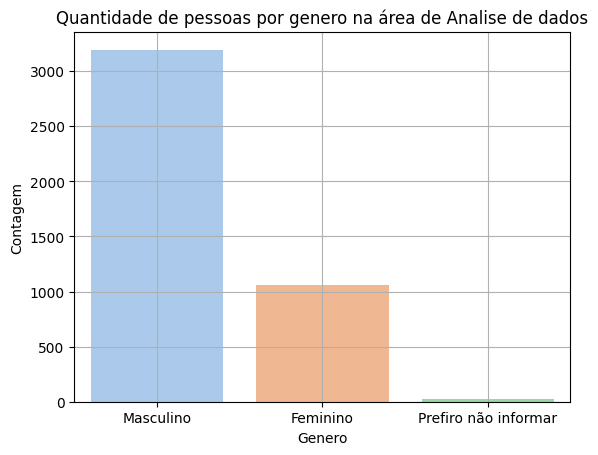

In [ ]:
#Criando segundo grafico usando biblioteca seaborn
plt.figure()
sns.countplot(data =  dados, x = 'GENERO', palette = 'pastel')
plt.title('Quantidade de pessoas por genero na √°rea de Analise de dados')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [ ]:
# Convertendo a coluna 'SALARIO' para num√©rica, tratando erros como NaN
dados['SALARIO'] = pd.to_numeric(dados['SALARIO'], errors='coerce')

# calculando a m√©dia de salarios por idade e atribuindo a variavel
salario_por_idade = dados.groupby("IDADE")['SALARIO'].mean()
salario_por_idade

IDADE
18.0     4230.307692
19.0     4519.590909
20.0     4778.384615
21.0     4578.737179
22.0     4394.689815
23.0     5602.406897
24.0     6151.622449
25.0     7616.392336
26.0     7700.071174
27.0     8237.429766
28.0     9737.938144
29.0     9381.944444
30.0    10143.087045
31.0     9715.518809
32.0    10843.197778
33.0    11360.678771
34.0    12294.640212
35.0    11965.506993
36.0    12000.908497
37.0    12267.252137
38.0    12953.717105
39.0    12114.520000
40.0    13855.730769
41.0    13578.880952
42.0    11801.037037
43.0    13574.170000
44.0    13727.670732
45.0    14204.743590
46.0    11913.709677
47.0    11156.031250
48.0    12249.714286
49.0    14556.000000
50.0    14607.045455
51.0     8977.900000
52.0    11779.475000
53.0     9850.000000
54.0    10353.833333
Name: SALARIO, dtype: float64

In [ ]:
#Criando grafico com a m√©dia salarial por idade
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values,  marker = 'o', linestyle = '--')
plt.xlabel('IDADE')
plt.ylabel('M√©dia de sal√°rio')
plt.title('M√©dia de sal√°rio por idade')
plt.grid(True)
plt.show()

In [ ]:
#importa√ß√£o da biblioteca plotly.express para gera√ß√£o de gr√°fico
import plotly.express as px

In [ ]:
#Criando gr√°fico da m√©dia salarial por idade com plotly.express
fig = px.line(salario_por_idade.reset_index(), x = 'IDADE', y = 'SALARIO', title = 'M√©dia de salario por idade', markers = True)
fig.show()

In [ ]:
#Criando gr√°fico de dispers√£o com matplotlib
plt.figure(figsize=(15,5))
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha=0.5)
plt.xlabel('IDADE')
plt.ylabel('SALARIO')
plt.title('Dispers√£o de salario por idade')
plt.grid(True)
plt.show()

In [ ]:
#Criando gr√°fico de dispers√£o com plotly.express
fig = px.scatter(dados, x = 'IDADE', y = 'SALARIO', title = 'Dispers√£o de salario por idade')
fig.show()

#Dashboards

Dashboards s√£o pain√©is interativos que agregam gr√°ficos e visualiza√ß√µes de dados em um √∫nico ambiente.

Facilitam a interpreta√ß√£o e tomada de decis√µes atrav√©s de filtros, sele√ß√µes e controles interativos.

Permitem visualizar diferentes aspectos dos dados em tempo real.

S√£o ferramentas essenciais para an√°lises complexas e multifacetadas.

√â como se estiv√©ssemos contando uma hist√≥ria, por√©m al√©m de usar s√≥ palavras estamos usando gr√°ficos, n√∫meros, tabelas, dados! √â um gibi de dados. E como em qualquer hist√≥ria, a ordem das informa√ß√µes √© importante para que ela fa√ßa sentido.

‚û°Ô∏èBenef√≠cios dos Dashboards:

**Vis√£o geral completa:** Re√∫nem diversas informa√ß√µes em um √∫nico local, facilitando a compreens√£o das rela√ß√µes entre os dados.

**An√°lise interativa:** Permitem explorar os dados em tempo real, filtrando, selecionando e ajustando visualiza√ß√µes.

**Tomada de decis√µes mais r√°pida:** Facilitam a identifica√ß√£o de padr√µes, tend√™ncias e insights acion√°veis.

**Comunica√ß√£o eficaz:** Transmitem informa√ß√µes de forma clara, concisa e visualmente atraente.

‚û°Ô∏èFerramentas para Cria√ß√£o de Dashboards:

**Power BI:** Ampla variedade de fontes de dados, visualiza√ß√µes interativas, ferramentas de limpeza e transforma√ß√£o de dados.

**Tableau:** Reconhecida pela facilidade de uso e poder de an√°lise visual.

**Qlik Sense:** Combina visualiza√ß√£o de dados com recursos avan√ßados de an√°lise.

**Looker:** Plataforma de intelig√™ncia de neg√≥cios baseada na nuvem, com foco na explora√ß√£o, visualiza√ß√£o e an√°lise de dados de forma intuitiva e colaborativa.

##Avaliar Dashboard baseado neste caderno criado com looker:
https://lookerstudio.google.com/reporting/8f5598c9-70ce-46b9-9d30-d146f86c909d